# Project description

**The task** is to help optimize marketing expenses.

We have:  
- Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
- Dump file with all orders for the period
- Marketing expenses statistics

We are going to study:  
- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off

**Description of the data**

The visits table (server logs with data on website visits):
- `Uid` — user's unique identifier
- `Device` — user's device
- `Start Ts` — session start date and time
- `End Ts` — session end date and time
- `Source Id` — identifier of the ad source the user came from
- All dates in this table are in YYYY-MM-DD format.

The orders table (data on orders):
- `Uid` — unique identifier of the user making an order
- `Buy Ts` — order date and time
- `Revenue` — Yandex.Afisha's revenue from the order

The costs table (data on marketing expenses):
- `source_id` — ad source identifier
- `dt` — date
- `costs` — expenses on this ad source on this day

# Step 1. Download the data and prepare it for analysis


## Initialization

In [7]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sidetable as stb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# printing more than 1 output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# making possible to display all columns/rows in output
pd.set_option('display.max_columns', None)

## Load the data

In [9]:
# Load the data
try:    
    visits = pd.read_csv(r'C:\Users\4from\Desktop\Practicum\7. BA\datasets\visits_log_us.csv')
    orders = pd.read_csv(r'C:\Users\4from\Desktop\Practicum\7. BA\datasets\orders_log_us.csv')
    costs = pd.read_csv(r'C:\Users\4from\Desktop\Practicum\7. BA\datasets\costs_us.csv')

except:
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    costs = pd.read_csv('/datasets/costs_us.csv')
    
# setting the names to our dataframes so we can refer to them later on     
visits.name = 'visits'   
orders.name = 'orders'
costs.name = 'costs'

Since we have several interconnected dataframes it looks reasonable to create a unified approach for checking them. For each dataframe we will study its' concise summary, overview - top rows, descriptive statistics, missing values and duplicates if any. Then we will address our findings.

In [11]:
data = [visits, orders, costs]

In [12]:
for df in data:
    print(f'\n Concise summary: {df.name}') 
    df.info(memory_usage='deep') # In order to find the exact size of the data, we add the parameter memory_usage='deep'
    print(f'\n Top rows: {df.name}') 
    df.head(5)
    print(f'\n Descriptive statistics: {df.name}') 
    df.describe()
    print(f'\n Missing values: {df.name}') 
    df.stb.missing(style=True)
    print(f'\n Number of duplicates: {df.name}')
    df.duplicated().sum()
    print('Share of duplicates:', round(df.duplicated().sum()/len(df)*100, 2), '%')
    print('-'*26)
    print('Duplicates:')
    print(df[df.duplicated()].head(10))
    print('\n','*'*70)
    


 Concise summary: visits
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB

 Top rows: visits


Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168


 Descriptive statistics: visits


Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19


 Missing values: visits



 Number of duplicates: visits


0

Share of duplicates: 0.0 %
--------------------------
Duplicates:
Empty DataFrame
Columns: [Device, End Ts, Source Id, Start Ts, Uid]
Index: []

 **********************************************************************

 Concise summary: orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB

 Top rows: orders


Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


 Descriptive statistics: orders


Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19


 Missing values: orders



 Number of duplicates: orders


0

Share of duplicates: 0.0 %
--------------------------
Duplicates:
Empty DataFrame
Columns: [Buy Ts, Revenue, Uid]
Index: []

 **********************************************************************

 Concise summary: costs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB

 Top rows: costs


source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


 Descriptive statistics: costs


source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000


 Missing values: costs



 Number of duplicates: costs


0

Share of duplicates: 0.0 %
--------------------------
Duplicates:
Empty DataFrame
Columns: [source_id, dt, costs]
Index: []

 **********************************************************************


## Observations
- data we see matches the Projects' description.
- no full duplicates revealed
- no missing values revealed
- the names of some columns are written not according to the "snake_case" format 
- significant memory usage - we can fix it by adjusting the data types

## Prepare the data

In [15]:
# Adjusting all the columns to the "snake_case" format 
for df in data:
    df.columns = df.columns.str.replace(' ', '_').str.lower()

# checking the result of renaming
for df in data:
    df.head(0)   

Empty DataFrame
Columns: [device, end_ts, source_id, start_ts, uid]
Index: []

Empty DataFrame
Columns: [buy_ts, revenue, uid]
Index: []

Empty DataFrame
Columns: [source_id, dt, costs]
Index: []

In [16]:
# Adjusting the data types
visits['device'] = visits['device'].astype('category')
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M:%S")
visits['start_ts'] =  pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M:%S")

orders['buy_ts'] =  pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")

costs['dt'] =  pd.to_datetime(costs['dt'], format="%Y-%m-%d")

# Converting 'source_id' to string to avoid AttributeErrors in Seaborn plot legends later in the project
for df in [visits, costs]:
    df['source_id'] = df['source_id'].astype('str')

# checking the result
for df in data:
    print(df.name)
    df.info(memory_usage='deep')
    print('\n')

visits
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  object        
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), object(1), uint64(1)
memory usage: 28.5 MB


orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


costs
<class 'pandas.core.frame.DataFrame'>
RangeI

# Step 2. Make reports and calculate metrics

## 1. Product
### How many people use it every day, week, and month?

Calculating metrics, such as DAU - daily active users, WAU - weekly active users, and MAU - monthly active users, will help answering this question. In order to calculate this metric, we group our data by date/week/month and count the number of unique user ids for that period.

In [20]:
# singling out months, weeks and dates from the column start_ts (session start date and time)
visits['session_month'] = visits['start_ts'].dt.to_period('M').dt.to_timestamp()
visits['session_week'] = visits['start_ts'].dt.to_period('W').dt.start_time
visits['session_date'] = visits['start_ts'].dt.date

visits.head()

device              end_ts source_id            start_ts  \
0    touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00         3 2017-12-27 14:06:00   

                    uid session_month session_week session_date  
0  16879256277535980062    2017-12-01   2017-12-18   2017-12-20  
1    104060357244891740    2018-02-01   2018-02-19   2018-02-19  
2   7459035603376831527    2017-07-01   2017-06-26   2017-07-01  
3  16174680259334210214    2018-05-01   2018-05-14   2018-05-20  
4   9969694820036681168    2017-12-01   2017-12-25   2017-12-27

In [21]:
# let's create dataframes with numbers of unique users each day, week, month 
dau = visits.groupby('session_date', as_index=False).agg({'uid':'nunique'})
wau = visits.groupby('session_week', as_index=False).agg({'uid':'nunique'})
mau = visits.groupby('session_month', as_index=False).agg({'uid':'nunique'})
dau.sample(5)

session_date   uid
292   2018-03-20  1171
198   2017-12-16  1040
74    2017-08-14   492
3     2017-06-04   476
2     2017-06-03   445

In [22]:
# checking mean and median values
print('DAU mean:', int(dau['uid'].mean()))
print('DAU median:', int(dau['uid'].median()), '\n')
print('WAU mean:', int(wau['uid'].mean()))
print('WAU median:', int(wau['uid'].median()), '\n')
print('MAU mean:', int(mau['uid'].mean()))
print('MAU median:', int(mau['uid'].median()), '\n')

DAU mean: 907
DAU median: 921 

WAU mean: 5716
WAU median: 5740 

MAU mean: 23228
MAU median: 24240 



In [23]:
wau[wau['uid'] == np.inf]

Empty DataFrame
Columns: [session_week, uid]
Index: []

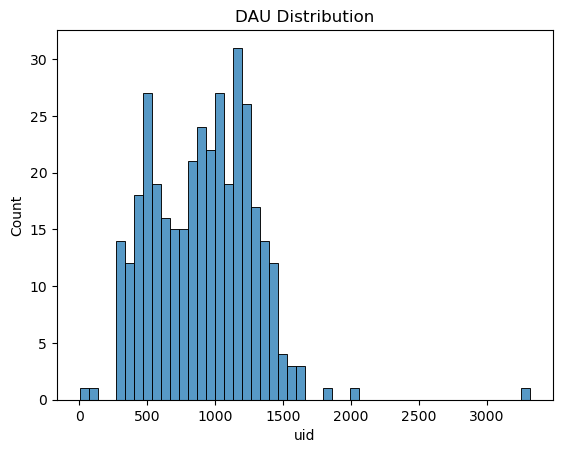

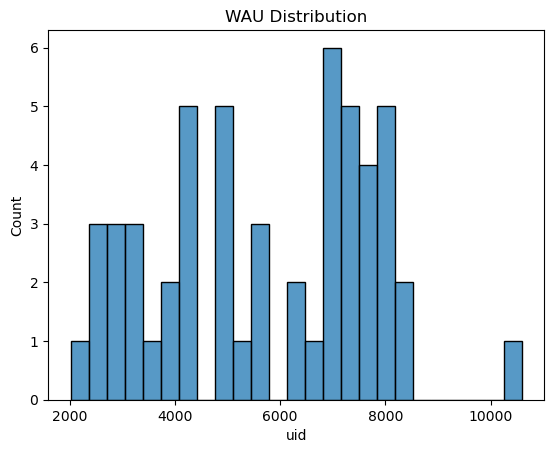

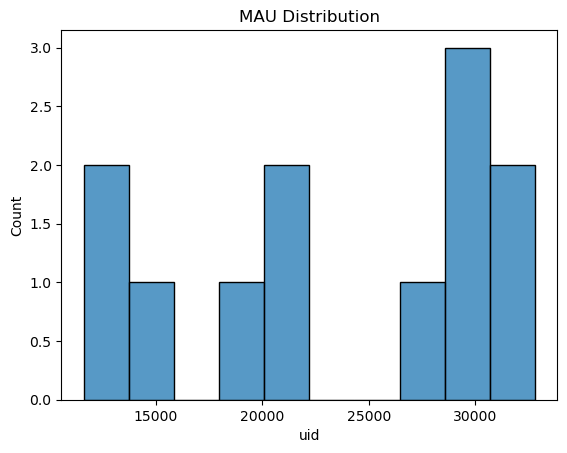

In [24]:
# checking distributions

# DAU distribution
sns.histplot(dau['uid'], bins=50)
plt.title('DAU Distribution')
plt.show();

# WAU distribution
sns.histplot(wau['uid'], bins=25)
plt.title('WAU Distribution')
plt.show();

# MAU distribution
sns.histplot(mau['uid'], bins=10)
plt.title('MAU Distribution')
plt.show();

The distributions are unsymmetrical and seems the data contains outliers, so  median (rather than mean) does a better job of capturing the *typical* number of users. 

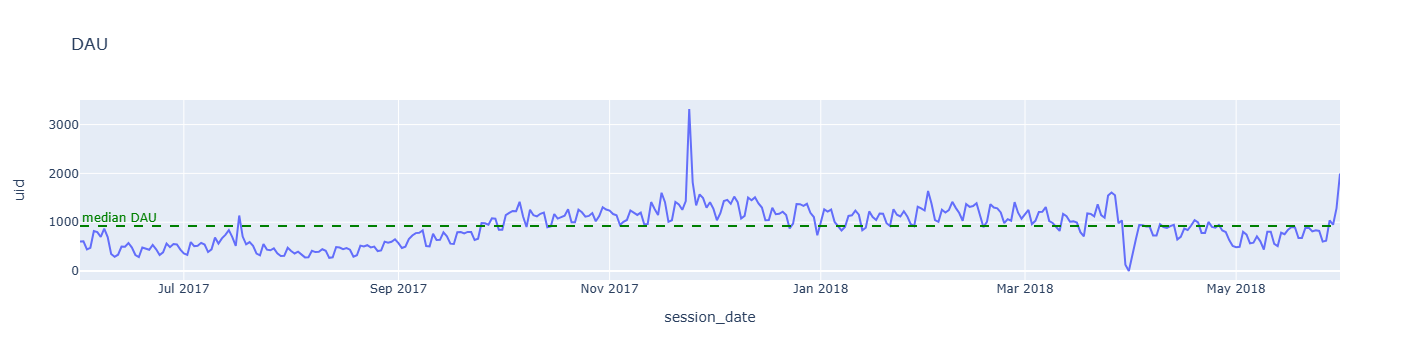

In [26]:
# Let's visualize our data to check the dynamics

# plotting linechart of DAU
fig = px.line(dau, x='session_date', y='uid', title='DAU')

# adding reference line with median DAU over time
fig.add_hline(y = dau['uid'].median(), line_dash= 'dash', line_color='green', annotation_text='median DAU',
              annotation_font_color="green", annotation_position='top left')
# fig.show()

As we can see from the graph, there are three major periods: 
- the first - from June 2017 to October 2017, where daily user number was below average; 
- the second - from October 2017 until the first half of March 2018, when activity was above average; 
- and the third - from the second half of March - up to the end of May 2018, there was a decrease. There was a peak in activity in the end of November 2017, which may be due to some major promotion/discounts event.

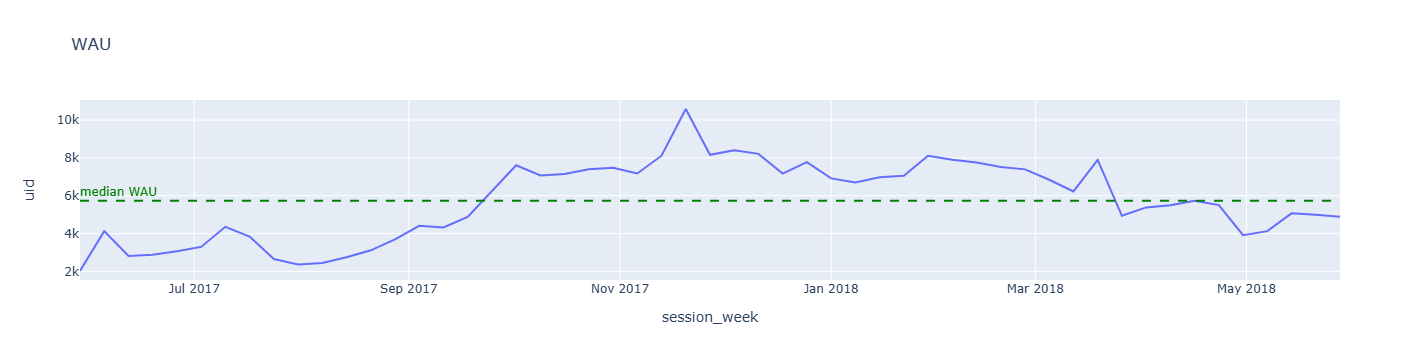

In [28]:
# plotting linechart of WAU
fig = px.line(wau, x='session_week', y='uid', title='WAU')

# adding reference line with median WAU over time
fig.add_hline(y = wau['uid'].median(), line_dash= 'dash', line_color='green', annotation_text='median WAU',
              annotation_font_color="green", annotation_position='top left')

There is certainly a noticeable consistent pattern evident in the Daily Active Users (DAU) plot, whereas the Weekly Active Users (WAU) plot appears to exhibit a smoother trend.

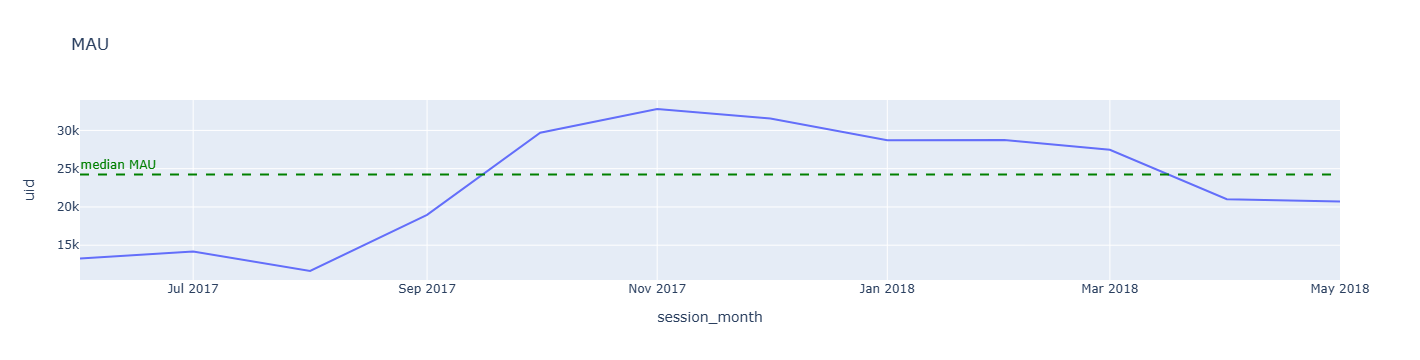

In [30]:
# plotting linechart of MAU
fig = px.line(mau, x='session_month', y='uid', title='MAU')

# adding reference line with median MAU over time
fig.add_hline(y = mau['uid'].median(), line_dash= 'dash', line_color='green', annotation_text='median MAU',
              annotation_font_color="green", annotation_position='top left')

As we can see, the picture of three main periods now is even more evident. 

**So the *overal numbers are the following:**
- DAU (daily active users) - 921 
- WAU (weekly active users) - 5894 
- MAU (monthly active users) - 24240 

*we rely on the median figures here, new users are counted

### How many sessions are there per day? (One user might have more than one session)

In order to perform this calculation, we must count the total number of sessions and the number of unique users. This will enable us to determine the average number of sessions per user for each day.

In [35]:
session_per_day = visits.groupby(['session_date'], as_index=False).agg({'uid': ['count', 'nunique']})
session_per_day.columns = ['session_date', 'sessions_count', 'users_unique']
session_per_day.head(5)

session_date  sessions_count  users_unique
0   2017-06-01             664           605
1   2017-06-02             658           608
2   2017-06-03             477           445
3   2017-06-04             510           476
4   2017-06-05             893           820

In [36]:
print('Typically users make:', int(session_per_day['sessions_count'].median()), 'sessions per day (median value)')

Typically users make: 1003 sessions per day (median value)


In [37]:
# let's also check the average number of sessions per user

session_per_day['sessions_per_user'] = session_per_day['sessions_count'] / session_per_day['users_unique']
session_per_day.head()

session_date  sessions_count  users_unique  sessions_per_user
0   2017-06-01             664           605           1.097521
1   2017-06-02             658           608           1.082237
2   2017-06-03             477           445           1.071910
3   2017-06-04             510           476           1.071429
4   2017-06-05             893           820           1.089024

In [38]:
print('On average a user make:', round(session_per_day['sessions_per_user'].median(),2), 'sessions a day')

On average a user make: 1.08 sessions a day


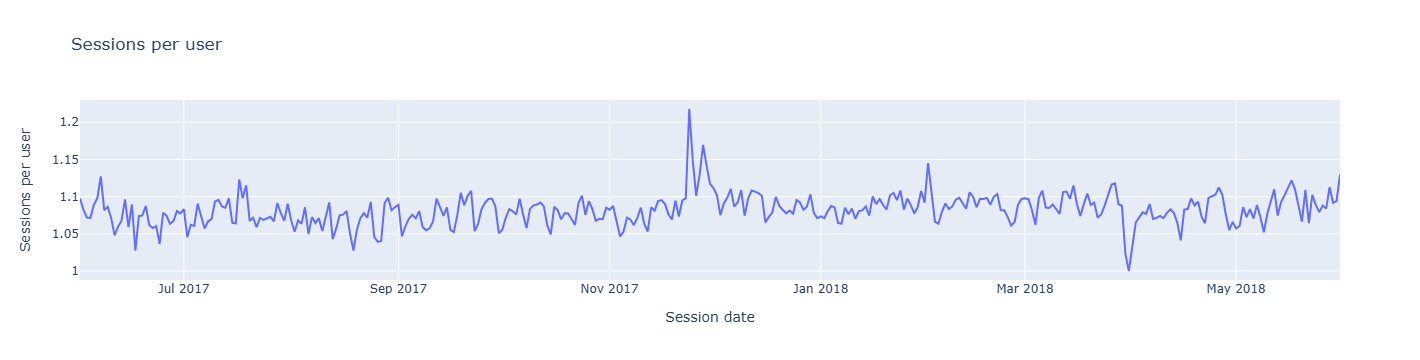

In [39]:
# let's compare the dynamics of total sessions per user to the dynamics of DAU from the previous question

# plotting linechart of daily sessions per user
fig = px.line(session_per_day, x = 'session_date', y = 'sessions_per_user', title = 'Sessions per user')
fig.update_layout(yaxis_title = 'Sessions per user', xaxis_title = 'Session date')

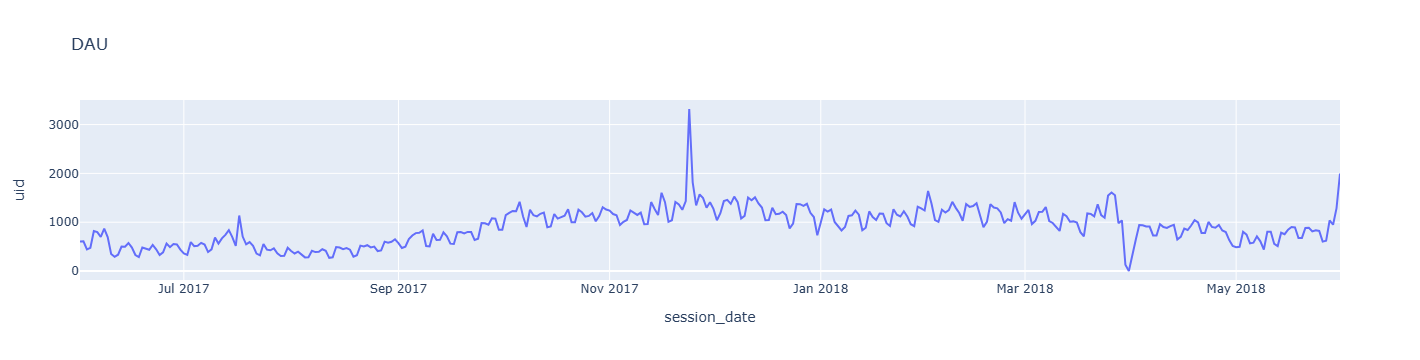

In [40]:
# comparing the linechart above with linechart of DAU
fig = px.line(dau, x='session_date', y='uid', title='DAU')
fig.show()

We can see that dynamics of sessions per user and DAU look pretty similar, in particular - the peaks are in the same periods of time. In the periods of major sales / promotions (as we guessed for the period in the end of November 2017) - an average user makes more sessions and the overall number of new users in this periods is also higher.

### What is the length of each session?

We need to calculate the time difference between the Start Timestamp (Start Ts) and End Timestamp (End Ts) for each session. By calculating the average difference in seconds across all sessions, we can obtain the average session length.

In [44]:
# creating 'session_length' field
visits['session_length'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()
visits.head()

device              end_ts source_id            start_ts  \
0    touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00         3 2017-12-27 14:06:00   

                    uid session_month session_week session_date  \
0  16879256277535980062    2017-12-01   2017-12-18   2017-12-20   
1    104060357244891740    2018-02-01   2018-02-19   2018-02-19   
2   7459035603376831527    2017-07-01   2017-06-26   2017-07-01   
3  16174680259334210214    2018-05-01   2018-05-14   2018-05-20   
4   9969694820036681168    2017-12-01   2017-12-25   2017-12-27   

   session_length  
0          1080.0  
1          1680.0  
2             0.0  
3          1440.0  
4             0.0

For answering the question about length of sessions it's worth checking descriptive statistics of this field and outliers as well.

In [46]:
visits['session_length'].describe()

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_length, dtype: float64

In [47]:
# let's check most obvious outliers - negative values of sessions lengh
visits[visits['session_length'] < 0]

device              end_ts source_id            start_ts  \
4181    desktop 2018-03-25 03:18:00         3 2018-03-25 03:50:00   
177972  desktop 2018-03-25 03:09:00         9 2018-03-25 03:55:00   

                         uid session_month session_week session_date  \
4181    13092152539246794986    2018-03-01   2018-03-19   2018-03-25   
177972   4621202742905035453    2018-03-01   2018-03-19   2018-03-25   

        session_length  
4181           -1920.0  
177972         -2760.0

We see two outliers with the end of the session earlier than the start time (probably due to some issues while logging). They don't significantly affect the data, but let's get rid of them since we already coughed them out. 

In [49]:
# getting rid of outliers
visits = visits[visits['session_length'] >= 0]

# checking result
visits['session_length'].describe()

count    359398.000000
mean        643.042287
std         997.105212
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_length, dtype: float64

In [50]:
# checking outliers by use of "percentile" approach, we we'll use not very "strict" 3% and 97% limits
np.percentile(visits['session_length'], 3) # checking 3% percentile value
np.percentile(visits['session_length'], 97) # checking 97% percentile value

0.0

2880.0

<Axes: xlabel='session_length'>

---------------------------------------
min border: -960
max border: 1920
The outliers are considered to be values below -960 and above 1920


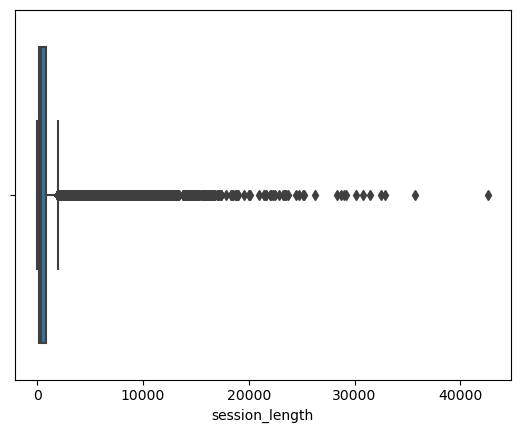

In [51]:
# checking outliers with by use of "1.5*IQR approach" (whiskers of boxplot). 

sns.boxplot(x=visits['session_length'],showfliers=True);
    
Q1 = round(visits['session_length'].quantile(0.25))
Q3 = round(visits['session_length'].quantile(0.75))
IQR = Q3-Q1
min_iqr=Q1-round(1.5*IQR) 
max_iqr=Q3+round(1.5*IQR)
print('---------------------------------------')
print('min border:',min_iqr)
print('max border:',max_iqr)
print('The outliers are considered to be values below',min_iqr, "and above",max_iqr)

In [52]:
# we see lots of zero values, just in case let's check some samples and their share of the whole dataset
visits.query('session_length==0').sample(5)
len(visits.query('session_length==0'))
len(visits.query('session_length==0'))/len(visits)*100 

device              end_ts source_id            start_ts  \
259137  desktop 2017-06-08 15:50:00         5 2017-06-08 15:50:00   
19347     touch 2017-11-20 21:47:00         3 2017-11-20 21:47:00   
66661   desktop 2017-09-15 18:56:00         4 2017-09-15 18:56:00   
109460    touch 2018-01-03 16:53:00         2 2018-01-03 16:53:00   
354331    touch 2017-11-07 23:18:00         3 2017-11-07 23:18:00   

                         uid session_month session_week session_date  \
259137  12770185893716368342    2017-06-01   2017-06-05   2017-06-08   
19347   12936167913627993096    2017-11-01   2017-11-20   2017-11-20   
66661   11410335211862953838    2017-09-01   2017-09-11   2017-09-15   
109460  11105891662708811169    2018-01-01   2018-01-01   2018-01-03   
354331   4680634397531862437    2017-11-01   2017-11-06   2017-11-07   

        session_length  
259137             0.0  
19347              0.0  
66661              0.0  
109460             0.0  
354331             0.0

35794

9.95943216155905

In [53]:
# let's check some samples of sessions longer than 2880 seconds (48 minutes) and their share of the whole dataset
visits.query('session_length > 2880').sample(5)
len(visits.query('session_length > 2880'))
len(visits.query('session_length > 2880'))/len(visits)*100 
#(visits['session_length'] > 2880).mean()

device              end_ts source_id            start_ts  \
226294  desktop 2017-10-06 12:42:00         2 2017-10-06 10:19:00   
105422  desktop 2018-02-27 12:11:00         2 2018-02-27 10:53:00   
269368  desktop 2017-07-10 16:34:00         3 2017-07-10 15:27:00   
311784  desktop 2018-02-07 11:56:00         3 2018-02-07 10:59:00   
271105  desktop 2017-11-24 16:58:00         3 2017-11-24 16:02:00   

                         uid session_month session_week session_date  \
226294  12780042542370479493    2017-10-01   2017-10-02   2017-10-06   
105422  11616947936617491261    2018-02-01   2018-02-26   2018-02-27   
269368   7612750018020008275    2017-07-01   2017-07-10   2017-07-10   
311784   4159648151201563957    2018-02-01   2018-02-05   2018-02-07   
271105  10729200578017139338    2017-11-01   2017-11-20   2017-11-24   

        session_length  
226294          8580.0  
105422          4680.0  
269368          4020.0  
311784          3420.0  
271105          3360.0

10776

2.9983472362116648

- Sessions lengths of zero seconds represent almost 10% of all the dataset! 

- Sessions longer than 48 minutes represent 3% of the data set.

- We could treat such data (with sessions lengths of zero seconds and longer than 48 minutes) as outliers and eliminate them. In any case, it can have a significant impact on the data and the analysis to come (at the moment, it seems like getting rid of the outliers would have a less positive impact than the possible harm). Moreover, we've got several datasets connected by the user ID field, and cutting data on one of them can hurt their merger while further analysis). It could look as if no time was spent, while there might be some. Thus it seems worth leaving such events/logs as they are rather than getting rid of them (as we don't know how to restore the data/put more exact numbers of seconds spent).We will leave outliers from the other side - sessions lasting more than 48 minutes - as they are in the data set to avoid aggravating the data skew.

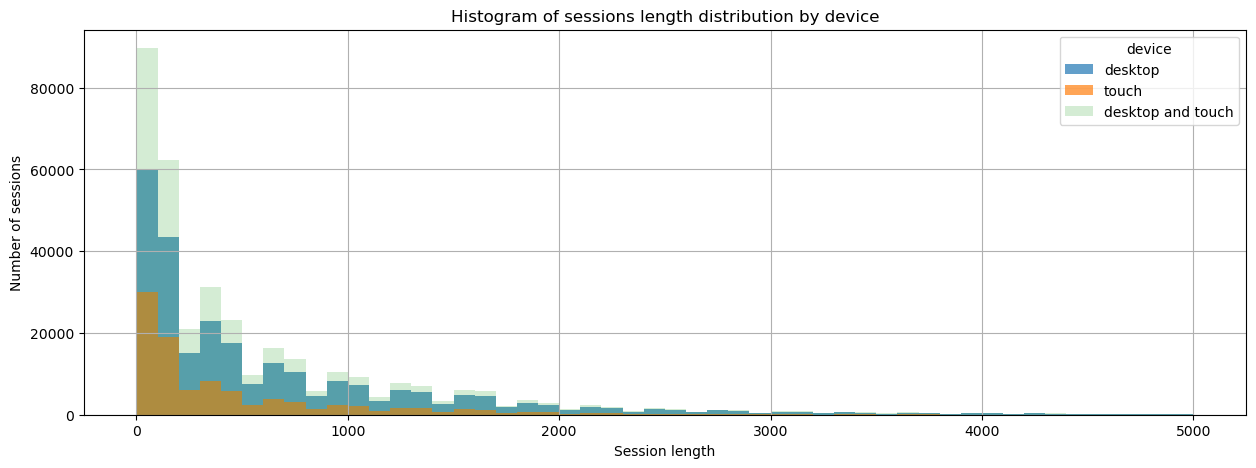

In [55]:
# let's check  sessions length distributions on different devices and in overall
visits.groupby('device')['session_length'].hist(bins=50, alpha = 0.7, range=(0, 5000), legend=True, figsize=(15,5))
visits['session_length'].hist(bins=50, alpha = 0.2, range=(0, 5000), legend=True, figsize=(15,5))
plt.xlabel('Session length')
plt.ylabel('Number of sessions')
plt.title('Histogram of sessions length distribution by device')
plt.legend(['desktop', 'touch', 'desktop and touch'],title='device');

The distributions are not normal - they are skewed. So median and mode would do a better job (rather than mean) of defining typical session lengths.

In [57]:
# cheking descriptive statistics
print('Touch, median and mode:', '\n', '-'*30)
visits.query('device=="touch"')['session_length'].median()
visits.query('device=="touch"')['session_length'].mode()

print('\n', 'Desktop, median and mode:', '\n', '-'*30)
visits.query('device=="desktop"')['session_length'].median()
visits.query('device=="desktop"')['session_length'].mode()

print('\n', 'Desktop and touch, median and mode:', '\n', '-'*30)
visits['session_length'].median()
visits['session_length'].mode()

Touch, median and mode: 
 ------------------------------


180.0

0    60.0
Name: session_length, dtype: float64


 Desktop, median and mode: 
 ------------------------------


360.0

0    60.0
Name: session_length, dtype: float64


 Desktop and touch, median and mode: 
 ------------------------------


300.0

0    60.0
Name: session_length, dtype: float64

- For all the devices the mode time of session is 60 seconds (the most common number in the data set). 
- While median values are different: 180 seconds for touch, 360 seconds for desktop and 300 for both desktop and touch. 
- Thus people use to have twice longer sessions on desktops.

### What's the user retention rate?

Retention rate tells us how many users from a cohort have remained active compared to their initial number. So to calculate the retention rate, we need to identify the initial visits of our users and divide that number by the total number of users in each subsequent time period.

In [61]:
# find the first session date
first_visits = visits.groupby(['uid'])['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_session_date']
first_visits.head() 

uid  first_session_date
0   11863502262781 2018-03-01 17:27:00
1   49537067089222 2018-02-06 15:55:00
2  297729379853735 2017-06-07 18:47:00
3  313578113262317 2017-09-18 22:49:00
4  325320750514679 2017-09-30 14:29:00

In [62]:
# adding the first session dates to the innitial data set
visits = visits.merge(first_visits, how='inner', on = 'uid')
visits.head(3)

device              end_ts source_id            start_ts  \
0    touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   

                    uid session_month session_week session_date  \
0  16879256277535980062    2017-12-01   2017-12-18   2017-12-20   
1    104060357244891740    2018-02-01   2018-02-19   2018-02-19   
2   7459035603376831527    2017-07-01   2017-06-26   2017-07-01   

   session_length  first_session_date  
0          1080.0 2017-12-20 17:20:00  
1          1680.0 2018-02-19 16:53:00  
2             0.0 2017-07-01 01:54:00

In [63]:
# singling first sessions months
visits['first_session_month'] = visits['first_session_date'].dt.to_period('M').dt.to_timestamp()
visits.head()

device              end_ts source_id            start_ts  \
0    touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00         3 2017-12-27 14:06:00   

                    uid session_month session_week session_date  \
0  16879256277535980062    2017-12-01   2017-12-18   2017-12-20   
1    104060357244891740    2018-02-01   2018-02-19   2018-02-19   
2   7459035603376831527    2017-07-01   2017-06-26   2017-07-01   
3  16174680259334210214    2018-05-01   2018-05-14   2018-05-20   
4   9969694820036681168    2017-12-01   2017-12-25   2017-12-27   

   session_length  first_session_date first_session_month  
0          1080.0 2017-12-20 17:20:00          2017-12-01  
1          1680.0 2018-02-19 16:53:00          2018-02-01  
2             0.0 2017-07-01 01:54:00          2017-07-01  
3          1440.0 2018-03-09 20:05:00          2018-03-01  
4             0.0 2017-12-27 14:06:00          2017-12-01

In [64]:
# defining cohort lifetime in days and months
visits['cohort_lifetime_days'] = (visits['session_month'] - visits['first_session_month']).dt.days
visits['cohort_lifetime_month'] = (visits['cohort_lifetime_days'] / 30.44).round().astype('int')
visits.head()

device              end_ts source_id            start_ts  \
0    touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00         3 2017-12-27 14:06:00   

                    uid session_month session_week session_date  \
0  16879256277535980062    2017-12-01   2017-12-18   2017-12-20   
1    104060357244891740    2018-02-01   2018-02-19   2018-02-19   
2   7459035603376831527    2017-07-01   2017-06-26   2017-07-01   
3  16174680259334210214    2018-05-01   2018-05-14   2018-05-20   
4   9969694820036681168    2017-12-01   2017-12-25   2017-12-27   

   session_length  first_session_date first_session_month  \
0          1080.0 2017-12-20 17:20:00          2017-12-01   
1          1680.0 2018-02-19 16:53:00          2018-02-01   
2             0.0 2017-07-01 01:54:00          2017-07-01   
3          1440.0 2018-03-09 20:05:00          2018-03-01   
4             0.0 2017-12-27 14:06:00          2017-12-01   

   cohort_lifetime_days  cohort_lifetime_month  
0                     0                      0  
1                     0                      0  
2                     0                      0  
3                    61                      2  
4                     0                      0

In [65]:
# group the data by cohort and lifetime and find the number of active users at a certain lifetime month for each cohort:
cohorts = visits.groupby(['first_session_month','cohort_lifetime_month']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

first_session_month  cohort_lifetime_month    uid
0          2017-06-01                      0  13259
1          2017-06-01                      1   1043
2          2017-06-01                      2    713
3          2017-06-01                      3    814
4          2017-06-01                      4    909

In [66]:
 # find the initial number of users in the cohort by looking at the 0-th month
initial_users_count = cohorts[cohorts['cohort_lifetime_month'] == 0][['first_session_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})
initial_users_count

first_session_month  cohort_users
0           2017-06-01         13259
12          2017-07-01         13140
23          2017-08-01         10181
33          2017-09-01         16704
42          2017-10-01         25977
50          2017-11-01         27248
57          2017-12-01         25268
63          2018-01-01         22624
68          2018-02-01         22197
72          2018-03-01         20589
75          2018-04-01         15709
77          2018-05-01         15273

In [67]:
# join the data on cohorts with the initial number of users in the cohort
cohorts = cohorts.merge(initial_users_count, on='first_session_month')

# let's leave only the year and month in the data on month of first order
cohorts['first_session_month'] = cohorts['first_session_month'].dt.strftime('%Y-%m') 
cohorts.head()

first_session_month  cohort_lifetime_month    uid  cohort_users
0             2017-06                      0  13259         13259
1             2017-06                      1   1043         13259
2             2017-06                      2    713         13259
3             2017-06                      3    814         13259
4             2017-06                      4    909         13259

In [68]:
# calculating the retention rate - by dividing the number of active users in each month 
# by the initial number of users in the cohort
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
cohorts.head()

first_session_month  cohort_lifetime_month    uid  cohort_users  retention
0             2017-06                      0  13259         13259   1.000000
1             2017-06                      1   1043         13259   0.078664
2             2017-06                      2    713         13259   0.053775
3             2017-06                      3    814         13259   0.061392
4             2017-06                      4    909         13259   0.068557

In [69]:
# compiling a pivot table 

retention_pivot = cohorts.pivot_table(
            index='first_session_month',
            columns='cohort_lifetime_month',
            values='retention',
            aggfunc='median',
            margins=True,
            margins_name='Retention_median'
            #fill_value=0
            )
retention_pivot

cohort_lifetime_month    0         1         2         3         4         5  \
first_session_month                                                            
2017-06                1.0  0.078664  0.053775  0.061392  0.068557  0.071423   
2017-07                1.0  0.056088  0.051294  0.056164  0.058219  0.048174   
2017-08                1.0  0.076908  0.062862  0.062764  0.050093  0.044004   
2017-09                1.0  0.085489  0.069205  0.050706  0.039392  0.037835   
2017-10                1.0  0.078608  0.052239  0.038958  0.034261  0.032221   
2017-11                1.0  0.078281  0.044113  0.038682  0.033727  0.023415   
2017-12                1.0  0.055802  0.037993  0.031107  0.020263  0.019036   
2018-01                1.0  0.059715  0.039339  0.024973  0.020244       NaN   
2018-02                1.0  0.057080  0.025454  0.020093       NaN       NaN   
2018-03                1.0  0.041818  0.027053       NaN       NaN       NaN   
2018-04                1.0  0.048380       NaN       NaN       NaN       NaN   
2018-05                1.0       NaN       NaN       NaN       NaN       NaN   
Retention_median       1.0  0.059715  0.047704  0.038958  0.036826  0.037835   

cohort_lifetime_month         6         7         8         9        10  \
first_session_month                                                       
2017-06                0.061015  0.057772  0.052342  0.050833  0.040652   
2017-07                0.045358  0.045738  0.038813  0.028615  0.027473   
2017-08                0.036342  0.039485  0.027895  0.026029       NaN   
2017-09                0.035860  0.024186  0.022809       NaN       NaN   
2017-10                0.021365  0.020364       NaN       NaN       NaN   
2017-11                0.021800       NaN       NaN       NaN       NaN   
2017-12                     NaN       NaN       NaN       NaN       NaN   
2018-01                     NaN       NaN       NaN       NaN       NaN   
2018-02                     NaN       NaN       NaN       NaN       NaN   
2018-03                     NaN       NaN       NaN       NaN       NaN   
2018-04                     NaN       NaN       NaN       NaN       NaN   
2018-05                     NaN       NaN       NaN       NaN       NaN   
Retention_median       0.036101  0.039485  0.033354  0.028615  0.034062   

cohort_lifetime_month        11  Retention_median  
first_session_month                                
2017-06                0.044951          0.059394  
2017-07                     NaN          0.048174  
2017-08                     NaN          0.047048  
2017-09                     NaN          0.039392  
2017-10                     NaN          0.036609  
2017-11                     NaN          0.038682  
2017-12                     NaN          0.034550  
2018-01                     NaN          0.039339  
2018-02                     NaN          0.041267  
2018-03                     NaN          0.041818  
2018-04                     NaN          0.524190  
2018-05                     NaN          1.000000  
Retention_median       0.044951          0.048277

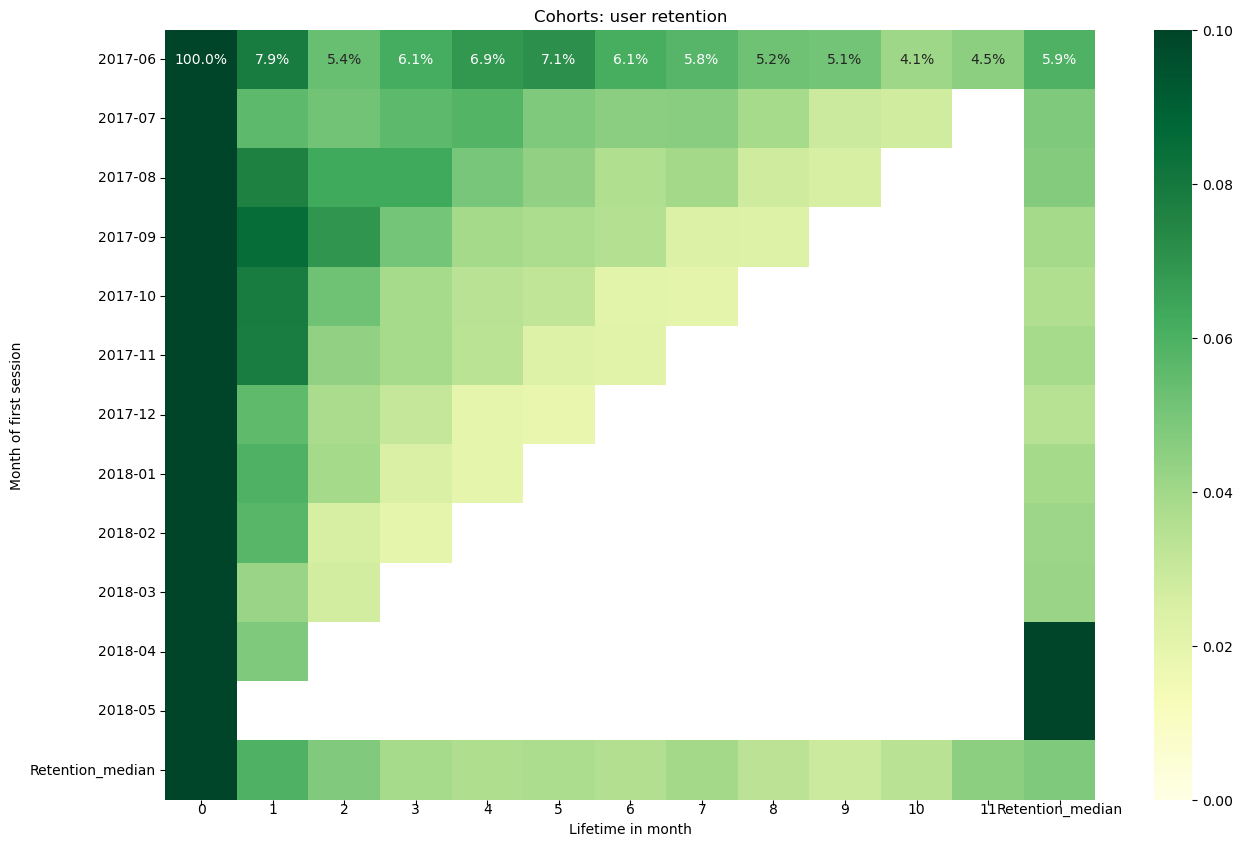

In [70]:
# making a heatmap 
# retention_pivot.index = retention_pivot.index.astype(str) #making indices output (dates) shorted

plt.figure(figsize=(15, 10))
plt.title('Cohorts: user retention')

# Create the heatmap with seaborn
ax = sns.heatmap(retention_pivot, 
                 annot=True, 
                 fmt='.1%', 
                 vmin=0.0,
                 vmax=0.1,
                 cmap='YlGn')

# Get the axis objects for further customization
ax = plt.gca()

# Rotate the Y-axis labels by 0 degrees (keeping the text horizontal)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, va='center')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, va='center')

plt.ylabel('Month of first session')
plt.xlabel('Lifetime in month');


- Retention median -  4,8% (for all months/cohorts)
- September's 2017 cohorts have the highest retention rate for the 1-st and 2-nd months' lifetime.
- June's 2017 retention rate keeps the highest positions in the long run.

## Sales
### When do people start buying? 
(In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d.)

In [73]:
orders

buy_ts  revenue                   uid
0     2017-06-01 00:10:00    17.00  10329302124590727494
1     2017-06-01 00:25:00     0.55  11627257723692907447
2     2017-06-01 00:27:00     0.37  17903680561304213844
3     2017-06-01 00:29:00     0.55  16109239769442553005
4     2017-06-01 07:58:00     0.37  14200605875248379450
...                   ...      ...                   ...
50410 2018-05-31 23:50:00     4.64  12296626599487328624
50411 2018-05-31 23:50:00     5.80  11369640365507475976
50412 2018-05-31 23:54:00     0.30   1786462140797698849
50413 2018-05-31 23:56:00     3.67   3993697860786194247
50414 2018-06-01 00:02:00     3.42     83872787173869366

[50415 rows x 3 columns]

In [74]:
# finding out time and date of first order

first_buy_ts = orders.groupby(['uid'])['buy_ts'].min().reset_index()
first_buy_ts.columns = ['uid', 'first_buy_ts']

orders = orders.merge(first_buy_ts, on='uid')
orders.head()

buy_ts  revenue                   uid        first_buy_ts
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00

In [75]:
# combining the data by each unique user
visits_orders = visits.merge(orders, how='inner', on='uid')
visits_orders.head()

device              end_ts source_id            start_ts  \
0  desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
1  desktop 2017-09-03 21:36:00         5 2017-09-03 21:35:00   
2  desktop 2017-09-03 21:36:00         5 2017-09-03 21:35:00   
3  desktop 2017-09-03 21:36:00         5 2017-09-03 21:35:00   
4  desktop 2018-02-06 15:50:00         4 2018-02-06 15:45:00   

                    uid session_month session_week session_date  \
0  16174680259334210214    2018-05-01   2018-05-14   2018-05-20   
1  16007536194108375387    2017-09-01   2017-08-28   2017-09-03   
2  16007536194108375387    2017-09-01   2017-08-28   2017-09-03   
3  16007536194108375387    2017-09-01   2017-08-28   2017-09-03   
4   8056418121947262981    2018-02-01   2018-02-05   2018-02-06   

   session_length  first_session_date first_session_month  \
0          1440.0 2018-03-09 20:05:00          2018-03-01   
1            60.0 2017-09-03 21:35:00          2017-09-01   
2            60.0 2017-09-03 21:35:00          2017-09-01   
3            60.0 2017-09-03 21:35:00          2017-09-01   
4           300.0 2017-06-04 14:17:00          2017-06-01   

   cohort_lifetime_days  cohort_lifetime_month              buy_ts  revenue  \
0                    61                      2 2018-03-09 20:25:00     2.33   
1                     0                      0 2017-09-04 12:46:00     2.44   
2                     0                      0 2017-10-28 00:01:00     1.53   
3                     0                      0 2017-10-28 19:16:00     1.53   
4                   245                      8 2017-06-25 08:54:00     3.67   

         first_buy_ts  
0 2018-03-09 20:25:00  
1 2017-09-04 12:46:00  
2 2017-09-04 12:46:00  
3 2017-09-04 12:46:00  
4 2017-06-25 08:54:00

In [76]:
visits_orders

device              end_ts source_id            start_ts  \
0       desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
1       desktop 2017-09-03 21:36:00         5 2017-09-03 21:35:00   
2       desktop 2017-09-03 21:36:00         5 2017-09-03 21:35:00   
3       desktop 2017-09-03 21:36:00         5 2017-09-03 21:35:00   
4       desktop 2018-02-06 15:50:00         4 2018-02-06 15:45:00   
...         ...                 ...       ...                 ...   
761802    touch 2018-01-25 17:38:19         1 2018-01-25 17:38:00   
761803    touch 2018-01-25 17:38:19         1 2018-01-25 17:38:00   
761804  desktop 2018-03-03 10:12:19         4 2018-03-03 10:12:00   
761805  desktop 2017-11-02 10:12:19         5 2017-11-02 10:12:00   
761806    touch 2017-09-10 13:13:19         2 2017-09-10 13:13:00   

                         uid session_month session_week session_date  \
0       16174680259334210214    2018-05-01   2018-05-14   2018-05-20   
1       16007536194108375387    2017-09-01   2017-08-28   2017-09-03   
2       16007536194108375387    2017-09-01   2017-08-28   2017-09-03   
3       16007536194108375387    2017-09-01   2017-08-28   2017-09-03   
4        8056418121947262981    2018-02-01   2018-02-05   2018-02-06   
...                      ...           ...          ...          ...   
761802  18370831553019119586    2018-01-01   2018-01-22   2018-01-25   
761803  18370831553019119586    2018-01-01   2018-01-22   2018-01-25   
761804  18387297585500748294    2018-03-01   2018-02-26   2018-03-03   
761805  18388616944624776485    2017-11-01   2017-10-30   2017-11-02   
761806  18396128934054549559    2017-09-01   2017-09-04   2017-09-10   

        session_length  first_session_date first_session_month  \
0               1440.0 2018-03-09 20:05:00          2018-03-01   
1                 60.0 2017-09-03 21:35:00          2017-09-01   
2                 60.0 2017-09-03 21:35:00          2017-09-01   
3                 60.0 2017-09-03 21:35:00          2017-09-01   
4                300.0 2017-06-04 14:17:00          2017-06-01   
...                ...                 ...                 ...   
761802            19.0 2018-01-25 17:38:00          2018-01-01   
761803            19.0 2018-01-25 17:38:00          2018-01-01   
761804            19.0 2018-03-03 10:12:00          2018-03-01   
761805            19.0 2017-11-02 10:12:00          2017-11-01   
761806            19.0 2017-09-10 13:13:00          2017-09-01   

        cohort_lifetime_days  cohort_lifetime_month              buy_ts  \
0                         61                      2 2018-03-09 20:25:00   
1                          0                      0 2017-09-04 12:46:00   
2                          0                      0 2017-10-28 00:01:00   
3                          0                      0 2017-10-28 19:16:00   
4                        245                      8 2017-06-25 08:54:00   
...                      ...                    ...                 ...   
761802                     0                      0 2018-01-25 17:38:00   
761803                     0                      0 2018-01-25 22:29:00   
761804                     0                      0 2018-03-03 10:12:00   
761805                     0                      0 2017-11-02 10:12:00   
761806                     0                      0 2017-09-10 13:13:00   

        revenue        first_buy_ts  
0          2.33 2018-03-09 20:25:00  
1          2.44 2017-09-04 12:46:00  
2          1.53 2017-09-04 12:46:00  
3          1.53 2017-09-04 12:46:00  
4          3.67 2017-06-25 08:54:00  
...         ...                 ...  
761802     2.93 2018-01-25 17:38:00  
761803     0.37 2018-01-25 17:38:00  
761804     0.61 2018-03-03 10:12:00  
761805     2.69 2017-11-02 10:12:00  
761806     1.22 2017-09-10 13:13:00  

[761807 rows x 16 columns]

In [77]:
# calculating time to first order
visits_orders['time_to_first_order'] = visits_orders['first_buy_ts'] - visits_orders['first_session_date']
visits_orders['sec_to_first_order'] = visits_orders['time_to_first_order'].dt.total_seconds()
visits_orders['days_to_first_order'] = visits_orders['time_to_first_order'] / np.timedelta64(1, 'D')

visits_orders.head()

device              end_ts source_id            start_ts  \
0  desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
1  desktop 2017-09-03 21:36:00         5 2017-09-03 21:35:00   
2  desktop 2017-09-03 21:36:00         5 2017-09-03 21:35:00   
3  desktop 2017-09-03 21:36:00         5 2017-09-03 21:35:00   
4  desktop 2018-02-06 15:50:00         4 2018-02-06 15:45:00   

                    uid session_month session_week session_date  \
0  16174680259334210214    2018-05-01   2018-05-14   2018-05-20   
1  16007536194108375387    2017-09-01   2017-08-28   2017-09-03   
2  16007536194108375387    2017-09-01   2017-08-28   2017-09-03   
3  16007536194108375387    2017-09-01   2017-08-28   2017-09-03   
4   8056418121947262981    2018-02-01   2018-02-05   2018-02-06   

   session_length  first_session_date first_session_month  \
0          1440.0 2018-03-09 20:05:00          2018-03-01   
1            60.0 2017-09-03 21:35:00          2017-09-01   
2            60.0 2017-09-03 21:35:00          2017-09-01   
3            60.0 2017-09-03 21:35:00          2017-09-01   
4           300.0 2017-06-04 14:17:00          2017-06-01   

   cohort_lifetime_days  cohort_lifetime_month              buy_ts  revenue  \
0                    61                      2 2018-03-09 20:25:00     2.33   
1                     0                      0 2017-09-04 12:46:00     2.44   
2                     0                      0 2017-10-28 00:01:00     1.53   
3                     0                      0 2017-10-28 19:16:00     1.53   
4                   245                      8 2017-06-25 08:54:00     3.67   

         first_buy_ts time_to_first_order  sec_to_first_order  \
0 2018-03-09 20:25:00     0 days 00:20:00              1200.0   
1 2017-09-04 12:46:00     0 days 15:11:00             54660.0   
2 2017-09-04 12:46:00     0 days 15:11:00             54660.0   
3 2017-09-04 12:46:00     0 days 15:11:00             54660.0   
4 2017-06-25 08:54:00    20 days 18:37:00           1795020.0   

   days_to_first_order  
0             0.013889  
1             0.632639  
2             0.632639  
3             0.632639  
4            20.775694

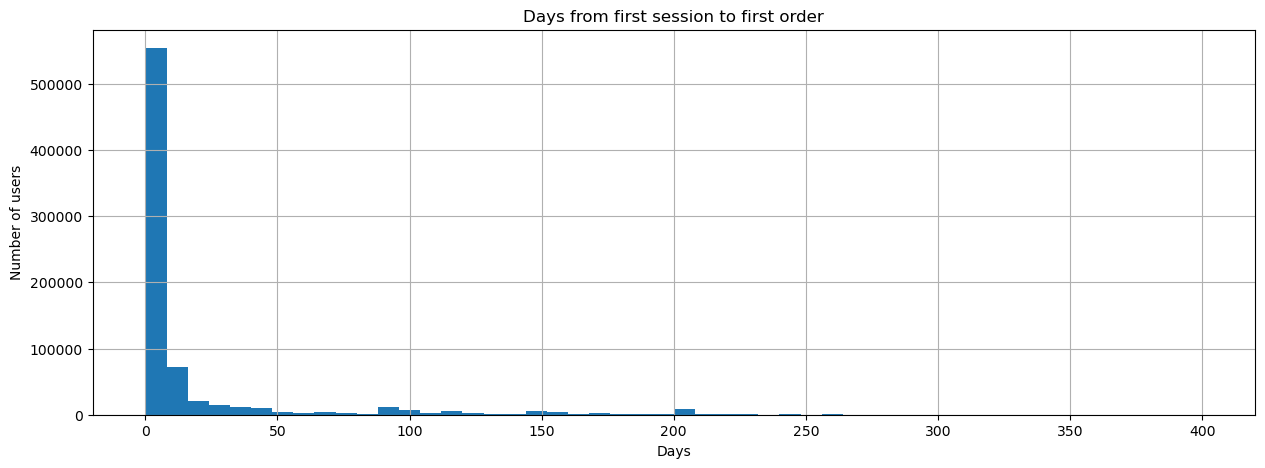

In [78]:
# plotting the histogram with distribution of time to first order
visits_orders['days_to_first_order'].hist(bins=50, range = (0,400), figsize = (15,5))
plt.title("Days from first session to first order")
plt.xlabel("Days")
plt.ylabel("Number of users");

The distribution is skewed, not normal - so median and mode would do a better job (rather than mean) of defining typical time from first session to first order.

In [80]:
# cheking descriptive statistics
print('Days to first order - descriptive statistics:', '\n', '-'*30)
visits_orders['days_to_first_order'].describe()

print('\n', 'Days to first order median and mode:', '\n', '-'*30)
visits_orders['days_to_first_order'].median()
visits_orders['days_to_first_order'].mode()

print('\n', 'Seconds to first order mode:', '\n', '-'*30)
visits_orders['sec_to_first_order'].mode()

Days to first order - descriptive statistics: 
 ------------------------------


count    761807.000000
mean         17.650719
std          42.368757
min           0.000000
25%           0.011806
50%           1.992361
75%           8.879861
max         363.294444
Name: days_to_first_order, dtype: float64


 Days to first order median and mode: 
 ------------------------------


1.992361111111111

0    0.0
Name: days_to_first_order, dtype: float64


 Seconds to first order mode: 
 ------------------------------


0    0.0
Name: sec_to_first_order, dtype: float64

In [81]:
visits_orders[visits_orders['sec_to_first_order'] == 0]['sec_to_first_order'].mean()

0.0

In [82]:
# checking % of data with zero-time from first visit to making an order
(visits_orders['sec_to_first_order'] == 0).mean()

0.11824648500210683

In [83]:
# counting overall conversation rate (% of users who placed orders)
conversion_rate = (orders['uid'].nunique()/visits['uid'].nunique()) * 100
conversion_rate

16.006994815246596

- the typical time from first visit to first order is 2 days (median value).
- in 12% of cases, the first order was placed within a 0 seconds period from the first session. It may be a problem with logging (technical or procedural in rules/metrics) or more likely, those orders are coming from users who originally got to the payment page after clicking on ads, direct links, or landing pages.
- overall conversation rate is 16% (% of users who placed orders)

### How many orders do they make during a given period of time?

In [86]:
# singling month of each order and first otder
orders['order_month'] = orders['buy_ts'].dt.to_period('M').dt.to_timestamp()
orders['first_order_month'] = orders['first_buy_ts'].dt.to_period('M').dt.to_timestamp()
orders.sample(5)

buy_ts  revenue                   uid        first_buy_ts  \
41210 2018-03-22 18:24:00     1.83  11099068423235366070 2018-02-20 14:16:00   
30006 2018-01-18 23:26:00     4.89   3278130872055759637 2018-01-18 23:26:00   
42106 2018-03-26 17:44:00     2.44   8323664388781654752 2018-03-26 17:44:00   
40370 2018-03-18 00:48:00     1.17  15005221477318051397 2018-02-26 20:52:00   
11065 2017-10-06 12:10:00     3.67  18339758861910163157 2017-10-01 10:56:00   

      order_month first_order_month  
41210  2018-03-01        2018-02-01  
30006  2018-01-01        2018-01-01  
42106  2018-03-01        2018-03-01  
40370  2018-03-01        2018-02-01  
11065  2017-10-01        2017-10-01

In [87]:
# defining numbers of new buyers by each month
cohorts_by_first_orders = orders.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index()
cohorts_by_first_orders.columns = ['first_order_month','cohort_size']
cohorts_by_first_orders.head()

first_order_month  cohort_size
0        2017-06-01         2023
1        2017-07-01         1923
2        2017-08-01         1370
3        2017-09-01         2581
4        2017-10-01         4340

In [88]:
# defining orders number according to first and current order month
orders_grouped_by_cohorts = orders.groupby(['first_order_month', 'order_month'], as_index=False)['buy_ts'].count()

orders_grouped_by_cohorts.columns = ['first_order_month', 'order_month', 'orders_number']

orders_grouped_by_cohorts.head(10)


first_order_month order_month  orders_number
0        2017-06-01  2017-06-01           2354
1        2017-06-01  2017-07-01            177
2        2017-06-01  2017-08-01            174
3        2017-06-01  2017-09-01            226
4        2017-06-01  2017-10-01            292
5        2017-06-01  2017-11-01            218
6        2017-06-01  2017-12-01            276
7        2017-06-01  2018-01-01            174
8        2017-06-01  2018-02-01            212
9        2017-06-01  2018-03-01            153

In [89]:
orders_grouped_by_cohorts

first_order_month order_month  orders_number
0         2017-06-01  2017-06-01           2354
1         2017-06-01  2017-07-01            177
2         2017-06-01  2017-08-01            174
3         2017-06-01  2017-09-01            226
4         2017-06-01  2017-10-01            292
..               ...         ...            ...
74        2018-03-01  2018-05-01            176
75        2018-04-01  2018-04-01           2495
76        2018-04-01  2018-05-01            195
77        2018-05-01  2018-05-01           3249
78        2018-06-01  2018-06-01              1

[79 rows x 3 columns]

In [90]:
# adding to the dataframe above numbers of new buyers by each month (merging with cohorts_by_first_orders dataframe)
orders_grouped_by_cohorts = orders_grouped_by_cohorts.merge(cohorts_by_first_orders, how = 'inner', 
                                                            on = 'first_order_month')

In [91]:
orders_grouped_by_cohorts.head(15)

first_order_month order_month  orders_number  cohort_size
0         2017-06-01  2017-06-01           2354         2023
1         2017-06-01  2017-07-01            177         2023
2         2017-06-01  2017-08-01            174         2023
3         2017-06-01  2017-09-01            226         2023
4         2017-06-01  2017-10-01            292         2023
5         2017-06-01  2017-11-01            218         2023
6         2017-06-01  2017-12-01            276         2023
7         2017-06-01  2018-01-01            174         2023
8         2017-06-01  2018-02-01            212         2023
9         2017-06-01  2018-03-01            153         2023
10        2017-06-01  2018-04-01             96         2023
11        2017-06-01  2018-05-01             86         2023
12        2017-07-01  2017-07-01           2186         1923
13        2017-07-01  2017-08-01            100         1923
14        2017-07-01  2017-09-01            120         1923

In [92]:
# let's arrange the columns differently for easier interpretation of data
orders_grouped_by_cohorts = orders_grouped_by_cohorts[['first_order_month', 'cohort_size', 'order_month', 
                                                       'orders_number']]

In [93]:
# defining cohorts' lifetimes
orders_grouped_by_cohorts['cohort_lifetime_days'] = ((orders_grouped_by_cohorts['order_month'] 
                                                     - orders_grouped_by_cohorts['first_order_month']).dt.days)
orders_grouped_by_cohorts['cohort_lifetime_month'] = ((orders_grouped_by_cohorts['cohort_lifetime_days'] / 30.44).round().astype('int'))
orders_grouped_by_cohorts 

first_order_month  cohort_size order_month  orders_number  \
0         2017-06-01         2023  2017-06-01           2354   
1         2017-06-01         2023  2017-07-01            177   
2         2017-06-01         2023  2017-08-01            174   
3         2017-06-01         2023  2017-09-01            226   
4         2017-06-01         2023  2017-10-01            292   
..               ...          ...         ...            ...   
74        2018-03-01         3533  2018-05-01            176   
75        2018-04-01         2276  2018-04-01           2495   
76        2018-04-01         2276  2018-05-01            195   
77        2018-05-01         2988  2018-05-01           3249   
78        2018-06-01            1  2018-06-01              1   

    cohort_lifetime_days  cohort_lifetime_month  
0                      0                      0  
1                     30                      1  
2                     61                      2  
3                     92                      3  
4                    122                      4  
..                   ...                    ...  
74                    61                      2  
75                     0                      0  
76                    30                      1  
77                     0                      0  
78                     0                      0  

[79 rows x 6 columns]

In [94]:
# defining number of order per user
orders_grouped_by_cohorts['orders_per_user'] = (orders_grouped_by_cohorts['orders_number'] 
                                                / orders_grouped_by_cohorts['cohort_size'])
orders_grouped_by_cohorts

first_order_month  cohort_size order_month  orders_number  \
0         2017-06-01         2023  2017-06-01           2354   
1         2017-06-01         2023  2017-07-01            177   
2         2017-06-01         2023  2017-08-01            174   
3         2017-06-01         2023  2017-09-01            226   
4         2017-06-01         2023  2017-10-01            292   
..               ...          ...         ...            ...   
74        2018-03-01         3533  2018-05-01            176   
75        2018-04-01         2276  2018-04-01           2495   
76        2018-04-01         2276  2018-05-01            195   
77        2018-05-01         2988  2018-05-01           3249   
78        2018-06-01            1  2018-06-01              1   

    cohort_lifetime_days  cohort_lifetime_month  orders_per_user  
0                      0                      0         1.163618  
1                     30                      1         0.087494  
2                     61                      2         0.086011  
3                     92                      3         0.111715  
4                    122                      4         0.144340  
..                   ...                    ...              ...  
74                    61                      2         0.049816  
75                     0                      0         1.096221  
76                    30                      1         0.085677  
77                     0                      0         1.087349  
78                     0                      0         1.000000  

[79 rows x 7 columns]

In [95]:
orders_grouped_by_cohorts

first_order_month  cohort_size order_month  orders_number  \
0         2017-06-01         2023  2017-06-01           2354   
1         2017-06-01         2023  2017-07-01            177   
2         2017-06-01         2023  2017-08-01            174   
3         2017-06-01         2023  2017-09-01            226   
4         2017-06-01         2023  2017-10-01            292   
..               ...          ...         ...            ...   
74        2018-03-01         3533  2018-05-01            176   
75        2018-04-01         2276  2018-04-01           2495   
76        2018-04-01         2276  2018-05-01            195   
77        2018-05-01         2988  2018-05-01           3249   
78        2018-06-01            1  2018-06-01              1   

    cohort_lifetime_days  cohort_lifetime_month  orders_per_user  
0                      0                      0         1.163618  
1                     30                      1         0.087494  
2                     61                      2         0.086011  
3                     92                      3         0.111715  
4                    122                      4         0.144340  
..                   ...                    ...              ...  
74                    61                      2         0.049816  
75                     0                      0         1.096221  
76                    30                      1         0.085677  
77                     0                      0         1.087349  
78                     0                      0         1.000000  

[79 rows x 7 columns]

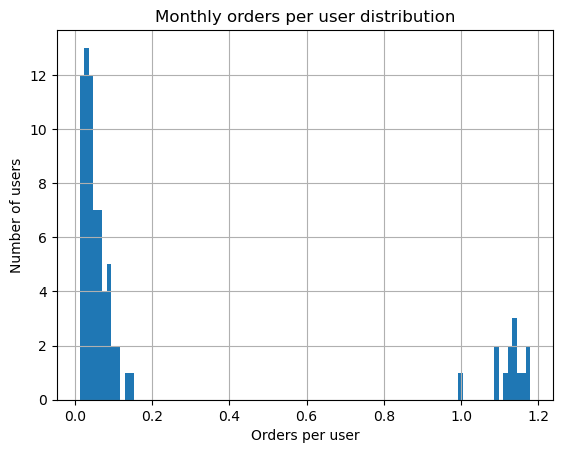

In [96]:
# checking monthly orders per user distribution
orders_grouped_by_cohorts['orders_per_user'].hist(bins=100)
plt.title('Monthly orders per user distribution')
plt.xlabel("Orders per user")
plt.ylabel("Number of users");

We see that distribution in not and normal and furthermore we observe two groups of values - from slightly above 0 up to aprox. 0.15 orders per month and from aprox. 0.9 up to aprox. 1.18 orders per month. 

Let's check which months and cohorts' lifetimes they represent.

In [98]:
print('orders_per_user > 0.9')
orders_grouped_by_cohorts.query('orders_per_user > 0.9').sample(5)

print('\n', 'orders_per_user < 0.18', '\n')
orders_grouped_by_cohorts.query('orders_per_user < 0.18').sample(5)

print('\n', '0.9 > orders_per_user > 0.18')
try:    
    orders_grouped_by_cohorts.query('0.9 > orders_per_user > 0.18').sample(5)
except:
    print('no cases found')

orders_per_user > 0.9


first_order_month  cohort_size order_month  orders_number  \
23        2017-08-01         1370  2017-08-01           1533   
33        2017-09-01         2581  2017-09-01           2933   
68        2018-02-01         3651  2018-02-01           4095   
78        2018-06-01            1  2018-06-01              1   
75        2018-04-01         2276  2018-04-01           2495   

    cohort_lifetime_days  cohort_lifetime_month  orders_per_user  
23                     0                      0         1.118978  
33                     0                      0         1.136381  
68                     0                      0         1.121611  
78                     0                      0         1.000000  
75                     0                      0         1.096221


 orders_per_user < 0.18 



first_order_month  cohort_size order_month  orders_number  \
44        2017-10-01         4340  2017-12-01            162   
52        2017-11-01         4081  2018-01-01            182   
59        2017-12-01         4383  2018-02-01            202   
69        2018-02-01         3651  2018-03-01            222   
38        2017-09-01         2581  2018-02-01            109   

    cohort_lifetime_days  cohort_lifetime_month  orders_per_user  
44                    61                      2         0.037327  
52                    61                      2         0.044597  
59                    62                      2         0.046087  
69                    28                      1         0.060805  
38                   153                      5         0.042232


 0.9 > orders_per_user > 0.18
no cases found


It seems, users typically made more than 0.9 orders only in zero cohort lifetime (session month - the same as the first session month). In all other cases - not more than 0.18 per month.

In [100]:
# cheking descriptive statistics of 'orders_per_user' column
orders_grouped_by_cohorts['orders_per_user'].describe()

# The distribution are unsymmetrical and seems the data contains some outliers, 
# so median (rather than mean) does a better job of capturing the typical number of users.

print('Typically users make:', round(orders_grouped_by_cohorts['orders_per_user'].median(), 2), 
      'orders per month (median value))')


count    79.000000
mean      0.228110
std       0.401973
min       0.012480
25%       0.030941
50%       0.051703
75%       0.086752
max       1.179368
Name: orders_per_user, dtype: float64

Typically users make: 0.05 orders per month (median value))


In [101]:
# Now we'll compile a pivot table of changes in average number of orders per user (numbers cumulative by months)
# whose columns will contain the lifetime and whose rows will be cohorts.

# Let's leave only the year and month in the data on month of first order
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m') 

orders_per_user_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime_month',
    values='orders_per_user',
    #aggfunc='median',
    #margins=True,
    #margins_name='Median_orders_per_user'
    #fill_value=0
).cumsum(axis=1) #  for cumulative sum across columns 

orders_per_user_pivot.round(2)

cohort_lifetime_month    0     1     2     3     4     5     6     7     8   \
first_order_month                                                             
2017-06                1.16  1.25  1.34  1.45  1.59  1.70  1.84  1.92  2.03   
2017-07                1.14  1.19  1.25  1.31  1.34  1.39  1.42  1.44  1.47   
2017-08                1.12  1.20  1.27  1.33  1.39  1.44  1.47  1.53  1.56   
2017-09                1.14  1.22  1.28  1.35  1.37  1.42  1.46  1.48  1.50   
2017-10                1.14  1.22  1.25  1.28  1.31  1.34  1.35  1.38   NaN   
2017-11                1.18  1.28  1.32  1.37  1.41  1.42  1.45   NaN   NaN   
2017-12                1.15  1.21  1.26  1.30  1.32  1.34   NaN   NaN   NaN   
2018-01                1.12  1.19  1.24  1.25  1.28   NaN   NaN   NaN   NaN   
2018-02                1.12  1.18  1.21  1.22   NaN   NaN   NaN   NaN   NaN   
2018-03                1.17  1.22  1.27   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04                1.10  1.18   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05                1.09   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-06                1.00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

cohort_lifetime_month    9     10    11  
first_order_month                        
2017-06                2.10  2.15  2.19  
2017-07                1.49  1.51   NaN  
2017-08                1.60   NaN   NaN  
2017-09                 NaN   NaN   NaN  
2017-10                 NaN   NaN   NaN  
2017-11                 NaN   NaN   NaN  
2017-12                 NaN   NaN   NaN  
2018-01                 NaN   NaN   NaN  
2018-02                 NaN   NaN   NaN  
2018-03                 NaN   NaN   NaN  
2018-04                 NaN   NaN   NaN  
2018-05                 NaN   NaN   NaN  
2018-06                 NaN   NaN   NaN

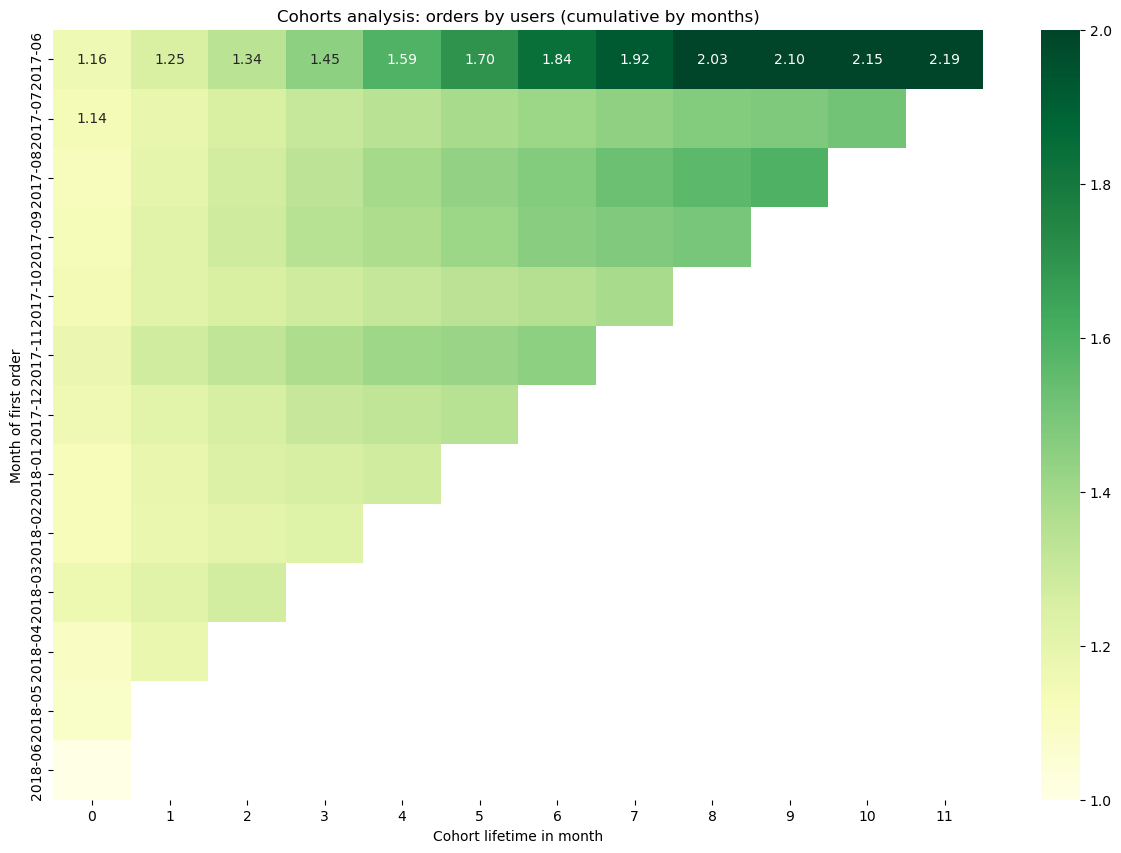

In [102]:
# making a heatmap (based on data cumulative by months)
# orders_per_user_pivot.index = orders_per_user_pivot.index.astype(str) #making indices output (dates) shorted
plt.figure(figsize=(15, 10))
plt.title('Cohorts analysis: orders by users (cumulative by months)')

# Create the heatmap with seaborn
ax = sns.heatmap(orders_per_user_pivot, 
            annot=True, 
            fmt='.2f', 
            vmin = 1,
            vmax = 2,
            cmap = 'YlGn')
plt.ylabel('Month of first order')
plt.xlabel('Cohort lifetime in month');


People in the June 2017 cohort placed typically more orders than in other cohorts.

Let's look at the number of orders placed from month to month.

Based on our analysis, we've determined that number of orders in the zero cohort is typically ten or more times higher than in the other periods, so we'll skip this slice of data for better visualization.

In [105]:
# compiling a pivot table of changes in average number of orders per user 
# (numbers NOT cumulative by months, WITHOUT zero cohort data), whose columns 
# will contain the lifetime and whose rows will be cohorts.

orders_per_user_pivot2 = orders_grouped_by_cohorts[orders_grouped_by_cohorts['cohort_lifetime_month'] > 0].pivot_table(
    index='first_order_month',
    columns='cohort_lifetime_month',
    values='orders_per_user',
    #aggfunc='median',
    #margins=True,
    #margins_name='Median_orders_per_user'
)

orders_per_user_pivot2 = orders_per_user_pivot2.round(2)

orders_per_user_pivot2 

cohort_lifetime_month    1     2     3     4     5     6     7     8     9   \
first_order_month                                                             
2017-06                0.09  0.09  0.11  0.14  0.11  0.14  0.09  0.10  0.08   
2017-07                0.05  0.06  0.05  0.04  0.04  0.03  0.03  0.03  0.01   
2017-08                0.08  0.07  0.06  0.06  0.05  0.04  0.06  0.03  0.03   
2017-09                0.08  0.06  0.06  0.03  0.04  0.04  0.02  0.02   NaN   
2017-10                0.07  0.04  0.03  0.03  0.02  0.02  0.03   NaN   NaN   
2017-11                0.10  0.04  0.05  0.03  0.01  0.02   NaN   NaN   NaN   
2017-12                0.06  0.05  0.04  0.02  0.02   NaN   NaN   NaN   NaN   
2018-01                0.07  0.05  0.02  0.02   NaN   NaN   NaN   NaN   NaN   
2018-02                0.06  0.02  0.02   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03                0.05  0.05   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04                0.09   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

cohort_lifetime_month    10    11  
first_order_month                  
2017-06                0.05  0.04  
2017-07                0.03   NaN  
2017-08                 NaN   NaN  
2017-09                 NaN   NaN  
2017-10                 NaN   NaN  
2017-11                 NaN   NaN  
2017-12                 NaN   NaN  
2018-01                 NaN   NaN  
2018-02                 NaN   NaN  
2018-03                 NaN   NaN  
2018-04                 NaN   NaN

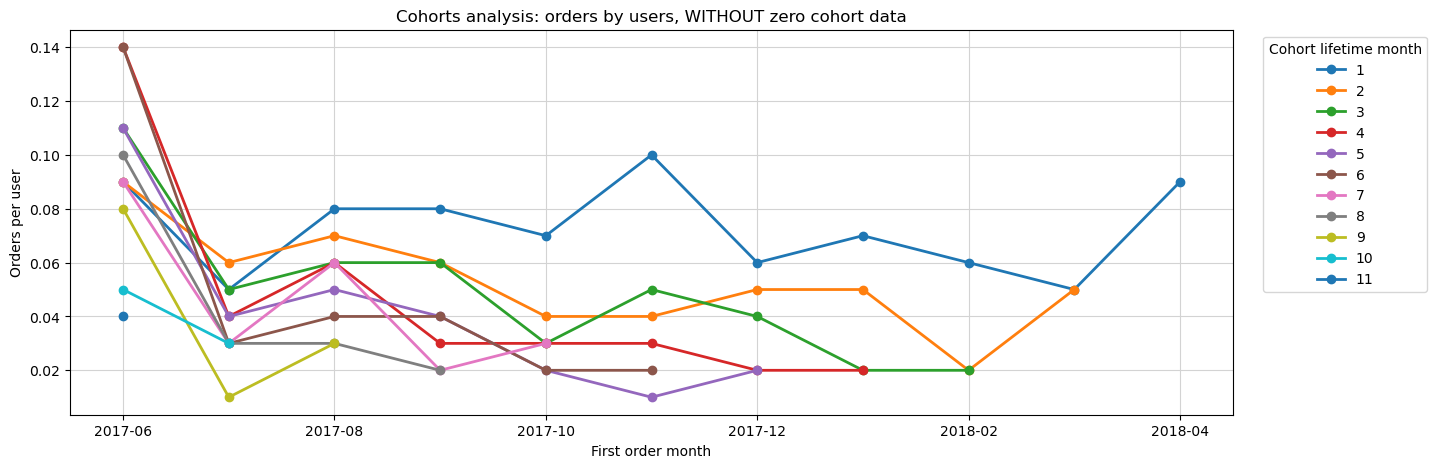

In [106]:
# making a lineplot (based on data NOT cumulative by months and without zero lifetime cohort)
ax = orders_per_user_pivot2.plot(kind='line', 
                                 figsize=(15,5), 
                                 title='Cohorts analysis: orders by users, WITHOUT zero cohort data',
                                 ylabel='Orders per user', 
                                 xlabel='First order month',
                                 linewidth=2,
                                 marker = 'o',
                                 legend=True)

plt.grid(True, color='lightgray')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title = 'Cohort lifetime month');

Except for the case with the first cohort, there seems to be a trend that users make fewer orders in later cohort lifetimes.

In [108]:
print('Median number of orders per user:', round(orders_per_user_pivot.median().median(), 2))
print('Median number of orders per user except 0 cohort lifetime:', round(orders_per_user_pivot2.median().median(), 2))

Median number of orders per user: 1.43
Median number of orders per user except 0 cohort lifetime: 0.04


### What is the average purchase size?

In [110]:
# checking original dataframe
orders.head()

buy_ts  revenue                   uid        first_buy_ts  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  order_month first_order_month  
0  2017-06-01        2017-06-01  
1  2017-06-01        2017-06-01  
2  2017-06-01        2017-06-01  
3  2017-06-01        2017-06-01  
4  2017-06-01        2017-06-01

In [111]:
# building dataframe with order time and revenue
order_revenue = orders.groupby(['buy_ts'], as_index=False)['revenue'].sum()
order_revenue

buy_ts  revenue
0     2017-06-01 00:10:00    17.00
1     2017-06-01 00:25:00     0.55
2     2017-06-01 00:27:00     0.37
3     2017-06-01 00:29:00     0.55
4     2017-06-01 07:58:00     0.37
...                   ...      ...
45986 2018-05-31 23:43:00     3.67
45987 2018-05-31 23:50:00    10.44
45988 2018-05-31 23:54:00     0.30
45989 2018-05-31 23:56:00     3.67
45990 2018-06-01 00:02:00     3.42

[45991 rows x 2 columns]

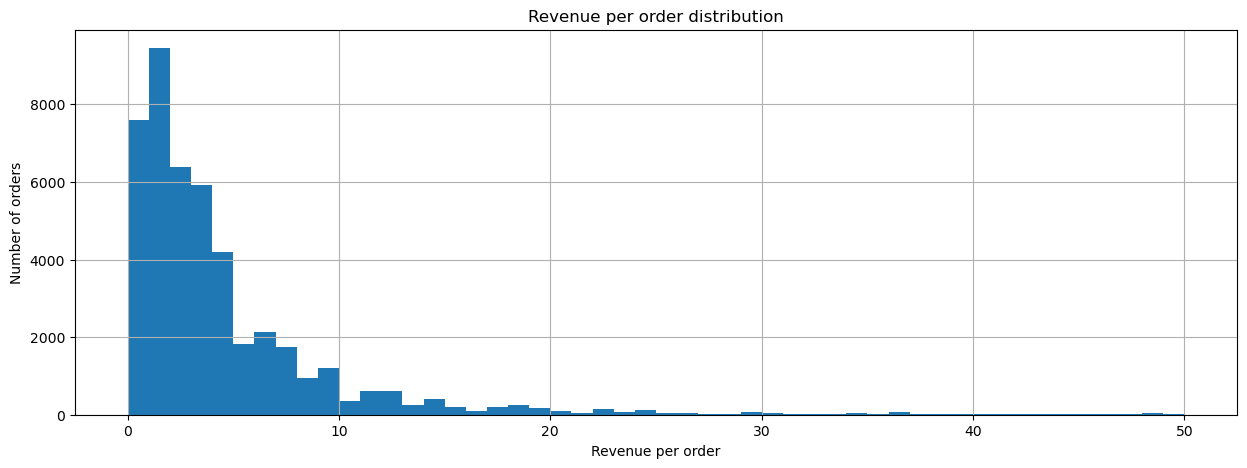

In [112]:
# checking revenue per order distribution
order_revenue['revenue'].hist( bins=50, figsize=(15,5), range=(0, 50))
plt.title('Revenue per order distribution')
plt.xlabel("Revenue per order")
plt.ylabel("Number of orders");


The distribution is skewed. So median would do a better job (rather than mean) of defining typical revenue per order.

<Axes: xlabel='revenue'>

---------------------------------------
min border: -7
max border: 14
The outliers are considered to be values below -7 and above 14
The typical order revenue is 2.82 (median value)


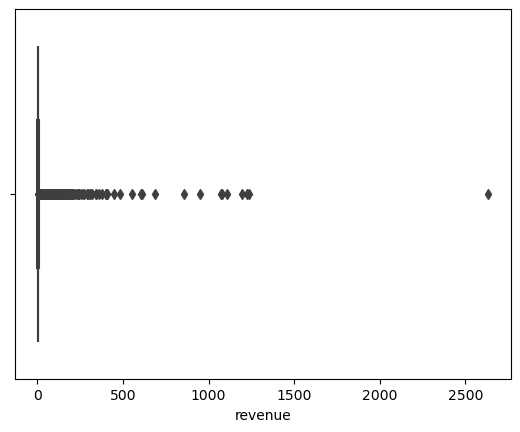

In [114]:
# checking outliers with by use of "1.5*IQR approach" (whiskers of boxplot). 

sns.boxplot(x=order_revenue ['revenue'],showfliers=True);
    
Q1 = round(order_revenue ['revenue'].quantile(0.25))
Q3 = round(order_revenue ['revenue'].quantile(0.75))
IQR = Q3-Q1
min_iqr=Q1-round(1.5*IQR) 
max_iqr=Q3+round(1.5*IQR)
print('---------------------------------------')
print('min border:',min_iqr)
print('max border:',max_iqr)
print('The outliers are considered to be values below',min_iqr, "and above",max_iqr)

print('The typical order revenue is', order_revenue ['revenue'].median(), '(median value)')

In [115]:
# checking outliers by use of "percentile" approach, we we'll use not very "strict" 3% and 97% limits
np.percentile(order_revenue['revenue'], 3) # checking 3% percentile value
np.percentile(order_revenue['revenue'], 97) # checking 97% percentile value

0.3

20.162999999999958

<Axes: xlabel='revenue'>

---------------------------------------
min border: -7
max border: 14
The outliers are considered to be values below -7 and above 14


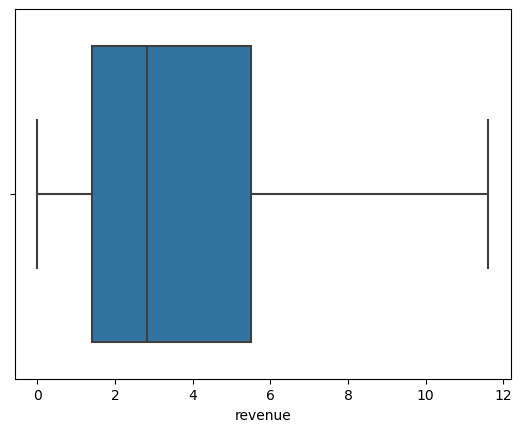

In [116]:
# checking outliers with by use of "1.5*IQR approach" (whiskers of boxplot).
sns.boxplot(x=order_revenue ['revenue'],showfliers=False);
    
Q1 = round(order_revenue ['revenue'].quantile(0.25))
Q3 = round(order_revenue ['revenue'].quantile(0.75))
IQR = Q3-Q1
min_iqr=Q1-round(1.5*IQR) 
max_iqr=Q3+round(1.5*IQR)
print('---------------------------------------')
print('min border:',min_iqr)
print('max border:',max_iqr)
print('The outliers are considered to be values below',min_iqr, "and above",max_iqr)

In [117]:
# cheking descriptive statistics of 'revenue' column
order_revenue['revenue'].describe()

print('The typical order revenue is', order_revenue ['revenue'].median(), '(median value)')

count    45991.000000
mean         5.480577
std         22.922826
min          0.000000
25%          1.400000
50%          2.820000
75%          5.500000
max       2633.280000
Name: revenue, dtype: float64

The typical order revenue is 2.82 (median value)


We see the outliers are present, we could get rid of them (e.g. by eliminating revenues over  20.16 according to "percentile" approach of defining of outliers) but we won't get rid of them - as such significant values could be due to e.g. some major sales; they also don't affect data much since we will use median values to describe typical revenues.


In [119]:
# let's check in which periods revenues per order were over 1000
order_revenue.query('revenue > 1000').sort_values(by='revenue', ascending=False)

buy_ts  revenue
21301 2017-12-10 20:17:00  2633.28
33340 2018-02-23 08:54:00  1236.28
33497 2018-02-24 09:25:00  1221.37
21234 2017-12-10 13:04:00  1195.64
22530 2017-12-17 18:06:00  1109.10
43453 2018-05-16 19:53:00  1080.44
36867 2018-03-18 09:13:00  1073.11

Three out of seven big orders were placed in December 2017, two out of seven in February 2018. Further investigations are needed if we'd like to get more details. But they are not so critical for our current study. 

In [121]:
# checking the innitial dataframe
orders.head()

buy_ts  revenue                   uid        first_buy_ts  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  order_month first_order_month  
0  2017-06-01        2017-06-01  
1  2017-06-01        2017-06-01  
2  2017-06-01        2017-06-01  
3  2017-06-01        2017-06-01  
4  2017-06-01        2017-06-01

In [122]:
# creating cohorts based on the first month of orders and displaying the median revenue values.
orders_cohorts = orders.groupby(['first_order_month', 'order_month'], as_index=False)['revenue'].median()
orders_cohorts['cohort_lifetime_days'] = (orders_cohorts['order_month'] - orders_cohorts['first_order_month']).dt.days
orders_cohorts['cohort_lifetime_month'] = (orders_cohorts['cohort_lifetime_days']/ 30.44).round().astype('int')

# Let's leave only the year and month in the data on month of first order
orders_cohorts['first_order_month'] = orders_cohorts['first_order_month'].dt.strftime('%Y-%m') 
orders_cohorts

first_order_month order_month  revenue  cohort_lifetime_days  \
0            2017-06  2017-06-01     2.44                     0   
1            2017-06  2017-07-01     3.60                    30   
2            2017-06  2017-08-01     3.05                    61   
3            2017-06  2017-09-01     4.28                    92   
4            2017-06  2017-10-01     3.30                   122   
..               ...         ...      ...                   ...   
74           2018-03  2018-05-01     2.87                    61   
75           2018-04  2018-04-01     2.78                     0   
76           2018-04  2018-05-01     3.05                    30   
77           2018-05  2018-05-01     2.44                     0   
78           2018-06  2018-06-01     3.42                     0   

    cohort_lifetime_month  
0                       0  
1                       1  
2                       2  
3                       3  
4                       4  
..                    ...  
74                      2  
75                      0  
76                      1  
77                      0  
78                      0  

[79 rows x 5 columns]

In [123]:
# building a pivot table with revenue of typical order
orders_cohorts_pivot = orders_cohorts.pivot_table(
    index='first_order_month', 
    columns='cohort_lifetime_month', 
    values='revenue', 
    aggfunc='mean',
    #fill_value='',
    margins=True,
    margins_name='Average revenue',
)

orders_cohorts_pivot.round(2)

cohort_lifetime_month     0     1     2     3     4     5     6     7     8  \
first_order_month                                                             
2017-06                2.44  3.60  3.05  4.28  3.30  2.44  3.05  3.05  3.39   
2017-07                3.05  2.81  3.85  3.05  2.38  2.44  2.44  3.58  2.26   
2017-08                2.75  3.79  3.67  4.28  4.58  3.67  3.05  3.05  4.73   
2017-09                2.44  4.89  2.93  5.53  2.93  4.89  3.40  3.48  3.91   
2017-10                2.44  2.75  2.69  2.72  3.30  2.62  2.38  2.57   NaN   
2017-11                2.44  1.95  1.83  3.18  2.09  2.44  3.12   NaN   NaN   
2017-12                2.66  2.41  2.96  3.05  2.36  2.44   NaN   NaN   NaN   
2018-01                2.44  2.44  2.44  3.05  2.08   NaN   NaN   NaN   NaN   
2018-02                2.44  2.44  2.33  2.26   NaN   NaN   NaN   NaN   NaN   
2018-03                2.44  2.20  2.87   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04                2.78  3.05   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05                2.44   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-06                3.42   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Average revenue        2.63  2.94  2.86  3.49  2.88  2.99  2.90  3.15  3.58   

cohort_lifetime_month     9    10    11  Average revenue  
first_order_month                                         
2017-06                3.67  4.28  1.83             3.20  
2017-07                4.64  3.67   NaN             3.11  
2017-08                3.42   NaN   NaN             3.70  
2017-09                 NaN   NaN   NaN             3.82  
2017-10                 NaN   NaN   NaN             2.68  
2017-11                 NaN   NaN   NaN             2.44  
2017-12                 NaN   NaN   NaN             2.65  
2018-01                 NaN   NaN   NaN             2.49  
2018-02                 NaN   NaN   NaN             2.37  
2018-03                 NaN   NaN   NaN             2.50  
2018-04                 NaN   NaN   NaN             2.92  
2018-05                 NaN   NaN   NaN             2.44  
2018-06                 NaN   NaN   NaN             3.42  
Average revenue        3.91  3.98  1.83             3.03

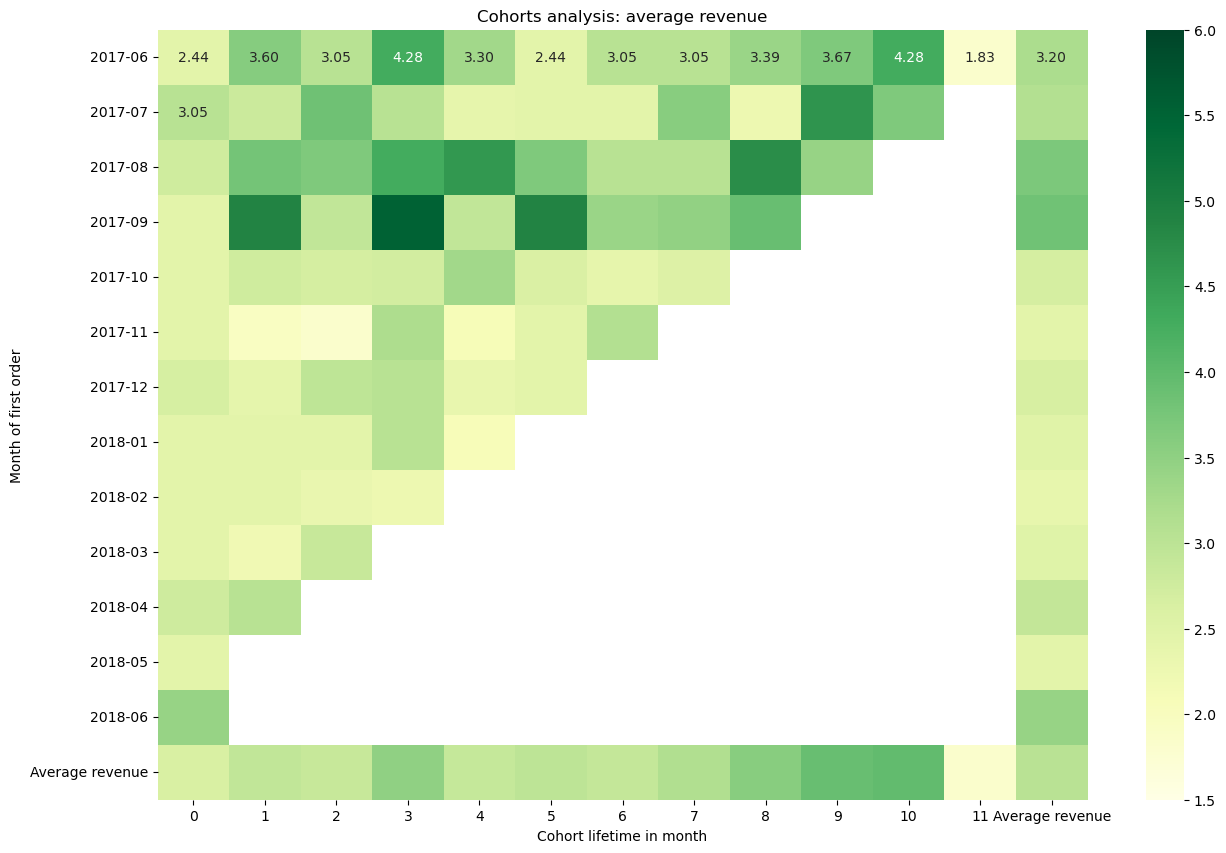

In [124]:
plt.figure(figsize=(15, 10))
plt.title('Cohorts analysis: average revenue')

# Create the heatmap with seaborn
ax = sns.heatmap(orders_cohorts_pivot, 
            annot=True, 
            fmt='.2f', 
            vmin = 1.5,
            vmax = 6,
            cmap = 'YlGn')

plt.ylabel('Month of first order')
plt.xlabel('Cohort lifetime in month');

In [125]:
orders_cohorts_pivot = orders_cohorts_pivot.reset_index()

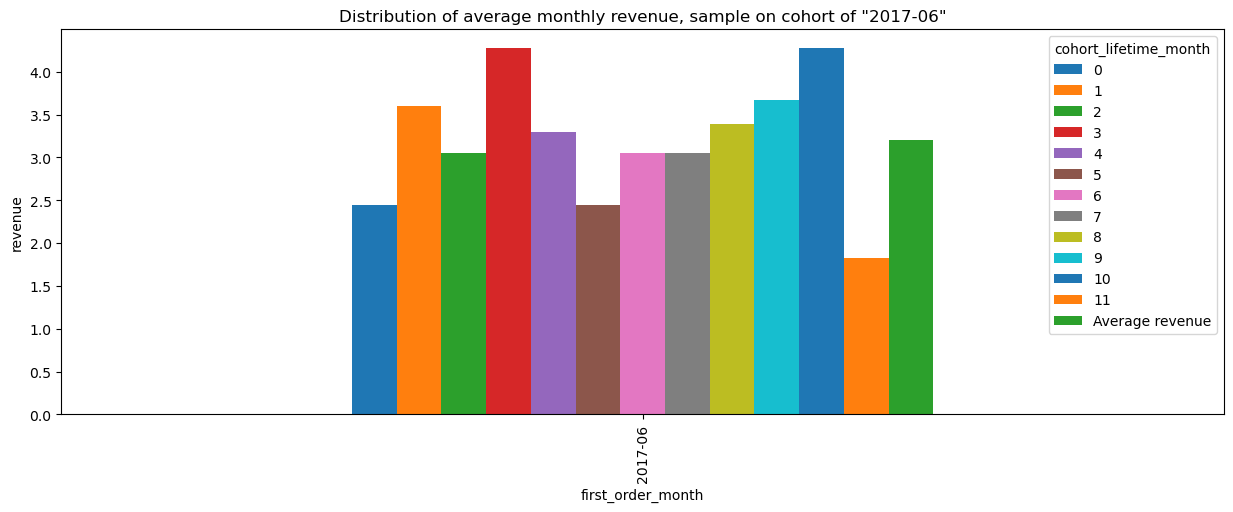

In [126]:
# checking distribution of average monthly revenue, sample on cohort of "2017-06"
orders_cohorts_pivot.query('first_order_month == "2017-06"').plot(
    kind='bar', 
    x= 'first_order_month',                                                                                                                                                             figsize=[15,5],
    title = 'Distribution of average monthly revenue, sample on cohort of "2017-06"',
    ylabel='revenue'
);
                                                                       

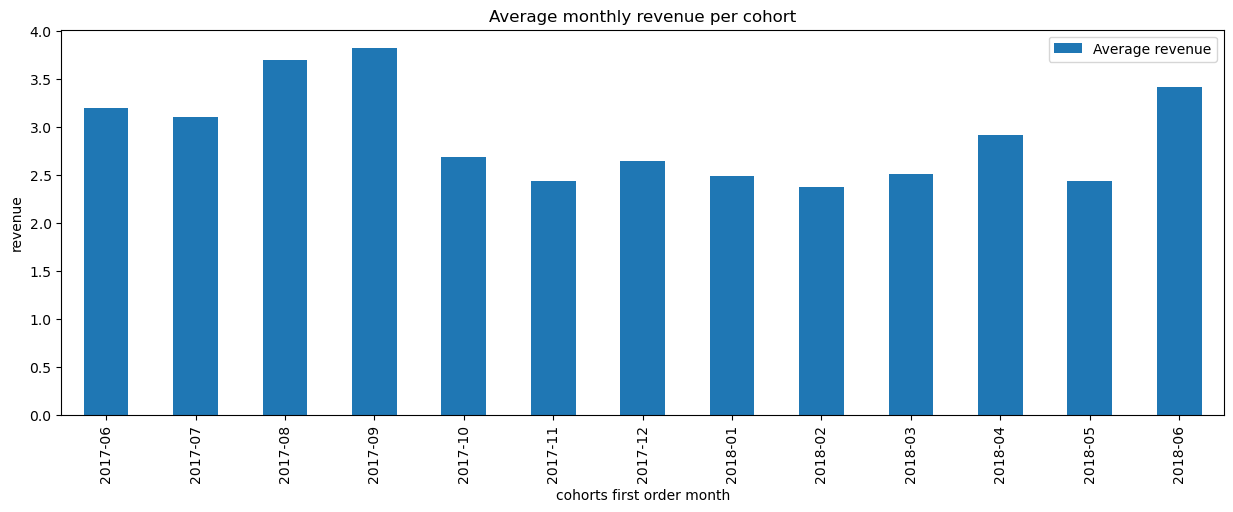

In [127]:
# checking average monthly revenue per cohort
orders_cohorts_pivot[orders_cohorts_pivot['first_order_month'] != "Average revenue"][['first_order_month','Average revenue']].\
                                                  plot(kind='bar', 
                                                  x= 'first_order_month', 
                                                  y = 'Average revenue',
                                                  figsize=[15,5],
                                                  title='Average monthly revenue per cohort',     
                                                  xlabel='cohorts first order month',
                                                  ylabel='revenue');

In [128]:
orders_cohorts['order_month'] = orders_cohorts['order_month'].dt.strftime('%Y-%m')

In [129]:
orders_cohorts.groupby('order_month')['revenue'].mean()

order_month
2017-06    2.440000
2017-07    3.325000
2017-08    2.870000
2017-09    3.590000
2017-10    3.470000
2017-11    2.870000
2017-12    3.272143
2018-01    2.686250
2018-02    3.248889
2018-03    2.746000
2018-04    3.152273
2018-05    2.805000
2018-06    3.420000
Name: revenue, dtype: float64

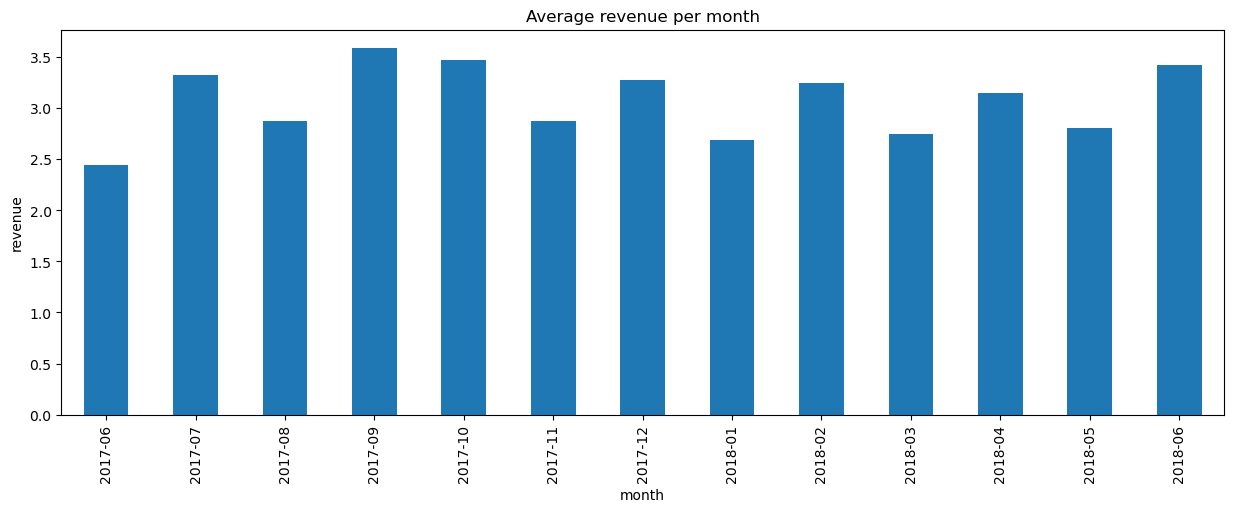

In [130]:
# checking average revenue per month
orders_cohorts.groupby('order_month')['revenue'].mean().plot(kind='bar', 
                                                  x= 'first_order_month', 
                                                  y = 'revenue',
                                                  figsize=[15,5],
                                                  title='Average revenue per month',     
                                                  xlabel='month',
                                                  ylabel='revenue');

- the cohort of September 2017 has the highest revenue figures in the 1-st, 3-rd and 5-th cohort's lifetime: 4.9, 5.5, 4.9.

- the cohort of August and September 2017 in general have the highest average revenues per order value: 3.7, 3.8

- in general, it appears that there is a trend: the longer the cohort lifetime, the greater the revenue per order.

In [132]:
orders.revenue.describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [133]:
orders.revenue.mean()

4.999646930477041

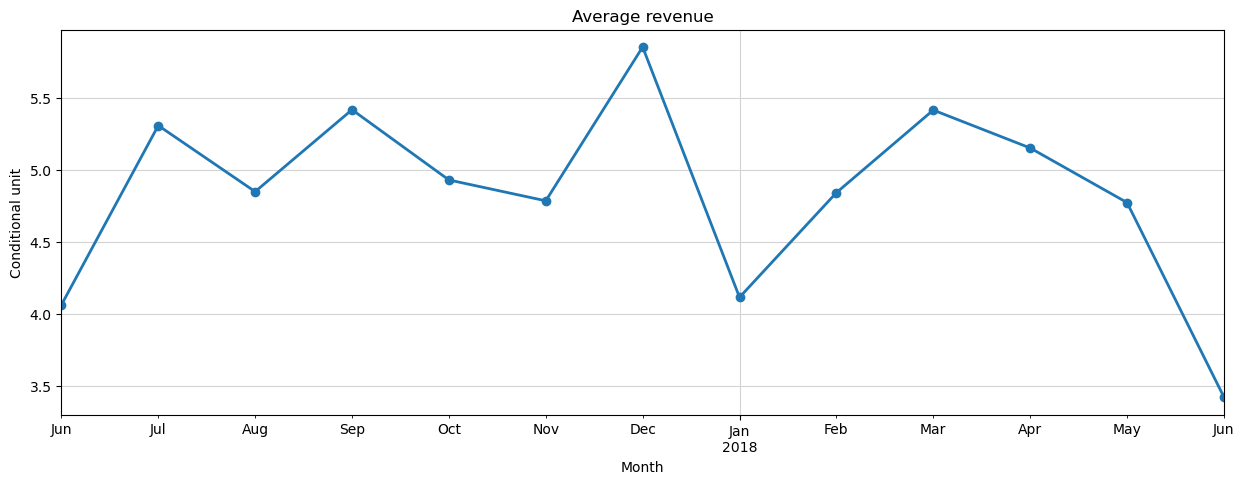

In [134]:
orders.pivot_table(index='order_month', values='revenue', aggfunc='mean').plot(marker='o', linewidth=2, legend=None, figsize=[15,5])\
.set(title = 'Average revenue', xlabel = 'Month', ylabel = 'Conditional unit')
plt.grid(True, color='lightgray')
plt.show();

### How much money do they bring? (LTV)

Let's recollect: LTV is the customer's lifetime value. It's the total amount of money a customer brings to the company on average by making purchases. When calculating LTV, analysts usually consider the gross profit from a customer per period.

In [137]:
# creating cohorts based on the first month of orders and displaying the total revenue values

ltv_cohort = orders.groupby(['first_order_month', 'order_month'], as_index=False)['revenue'].sum()
ltv_cohort['cohort_lifetime_days'] = (ltv_cohort['order_month'] - ltv_cohort['first_order_month']).dt.days
ltv_cohort['cohort_lifetime_month'] = (ltv_cohort['cohort_lifetime_days']/30.44).round(0).astype('int')
ltv_cohort

first_order_month order_month   revenue  cohort_lifetime_days  \
0         2017-06-01  2017-06-01   9557.49                     0   
1         2017-06-01  2017-07-01    981.82                    30   
2         2017-06-01  2017-08-01    885.34                    61   
3         2017-06-01  2017-09-01   1931.30                    92   
4         2017-06-01  2017-10-01   2068.58                   122   
..               ...         ...       ...                   ...   
74        2018-03-01  2018-05-01   1114.87                    61   
75        2018-04-01  2018-04-01  10600.69                     0   
76        2018-04-01  2018-05-01   1209.92                    30   
77        2018-05-01  2018-05-01  13925.76                     0   
78        2018-06-01  2018-06-01      3.42                     0   

    cohort_lifetime_month  
0                       0  
1                       1  
2                       2  
3                       3  
4                       4  
..                    ...  
74                      2  
75                      0  
76                      1  
77                      0  
78                      0  

[79 rows x 5 columns]

In [138]:
# let's merge the table above with the table with cohorts sizes
ltv_cohort = ltv_cohort.merge(cohorts_by_first_orders, how='inner', on=['first_order_month']) 

# let's leave only the year and month in the data on month of first order
ltv_cohort['first_order_month'] = ltv_cohort['first_order_month'].dt.strftime('%Y-%m')
ltv_cohort = ltv_cohort.rename(columns={'revenue': 'total_revenue'})
ltv_cohort.head()

first_order_month order_month  total_revenue  cohort_lifetime_days  \
0           2017-06  2017-06-01        9557.49                     0   
1           2017-06  2017-07-01         981.82                    30   
2           2017-06  2017-08-01         885.34                    61   
3           2017-06  2017-09-01        1931.30                    92   
4           2017-06  2017-10-01        2068.58                   122   

   cohort_lifetime_month  cohort_size  
0                      0         2023  
1                      1         2023  
2                      2         2023  
3                      3         2023  
4                      4         2023

In [139]:
# calculating the LTV
ltv_cohort['ltv'] = ltv_cohort['total_revenue'] / ltv_cohort['cohort_size']

In [140]:
ltv_cohort.head()

first_order_month order_month  total_revenue  cohort_lifetime_days  \
0           2017-06  2017-06-01        9557.49                     0   
1           2017-06  2017-07-01         981.82                    30   
2           2017-06  2017-08-01         885.34                    61   
3           2017-06  2017-09-01        1931.30                    92   
4           2017-06  2017-10-01        2068.58                   122   

   cohort_lifetime_month  cohort_size       ltv  
0                      0         2023  4.724414  
1                      1         2023  0.485329  
2                      2         2023  0.437637  
3                      3         2023  0.954671  
4                      4         2023  1.022531

In [141]:
# now we'll compile a pivot table with cumulative revenues

ltv_cohort_pivot = ltv_cohort.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime_month',
    values='ltv',
    #fill_value=''
).cumsum(axis=1) #  for cumulative sum across columns 

ltv_cohort_pivot.round(2)


cohort_lifetime_month    0     1     2      3      4      5      6      7   \
first_order_month                                                            
2017-06                4.72  5.21  5.65   6.60   7.62   8.36   9.31   9.89   
2017-07                6.01  6.35  6.97   7.33   7.50   7.66   7.78   7.92   
2017-08                5.28  5.75  6.21   6.60   7.09   7.38   7.59   7.99   
2017-09                5.64  6.76  7.28  11.26  11.66  12.31  13.01  13.25   
2017-10                5.00  5.54  5.73   5.89   6.04   6.16   6.24   6.36   
2017-11                5.15  5.55  5.75   6.08   6.23   6.28   6.40    NaN   
2017-12                4.74  5.00  5.92   6.99   7.30   7.64    NaN    NaN   
2018-01                4.14  4.43  4.73   4.88   4.94    NaN    NaN    NaN   
2018-02                4.16  4.44  4.51   4.59    NaN    NaN    NaN    NaN   
2018-03                4.84  5.14  5.46    NaN    NaN    NaN    NaN    NaN   
2018-04                4.66  5.19   NaN    NaN    NaN    NaN    NaN    NaN   
2018-05                4.66   NaN   NaN    NaN    NaN    NaN    NaN    NaN   
2018-06                3.42   NaN   NaN    NaN    NaN    NaN    NaN    NaN   

cohort_lifetime_month     8      9      10     11  
first_order_month                                  
2017-06                10.45  11.05  11.62  11.88  
2017-07                 8.08   8.23   8.39    NaN  
2017-08                 8.28   8.47    NaN    NaN  
2017-09                13.44    NaN    NaN    NaN  
2017-10                  NaN    NaN    NaN    NaN  
2017-11                  NaN    NaN    NaN    NaN  
2017-12                  NaN    NaN    NaN    NaN  
2018-01                  NaN    NaN    NaN    NaN  
2018-02                  NaN    NaN    NaN    NaN  
2018-03                  NaN    NaN    NaN    NaN  
2018-04                  NaN    NaN    NaN    NaN  
2018-05                  NaN    NaN    NaN    NaN  
2018-06                  NaN    NaN    NaN    NaN

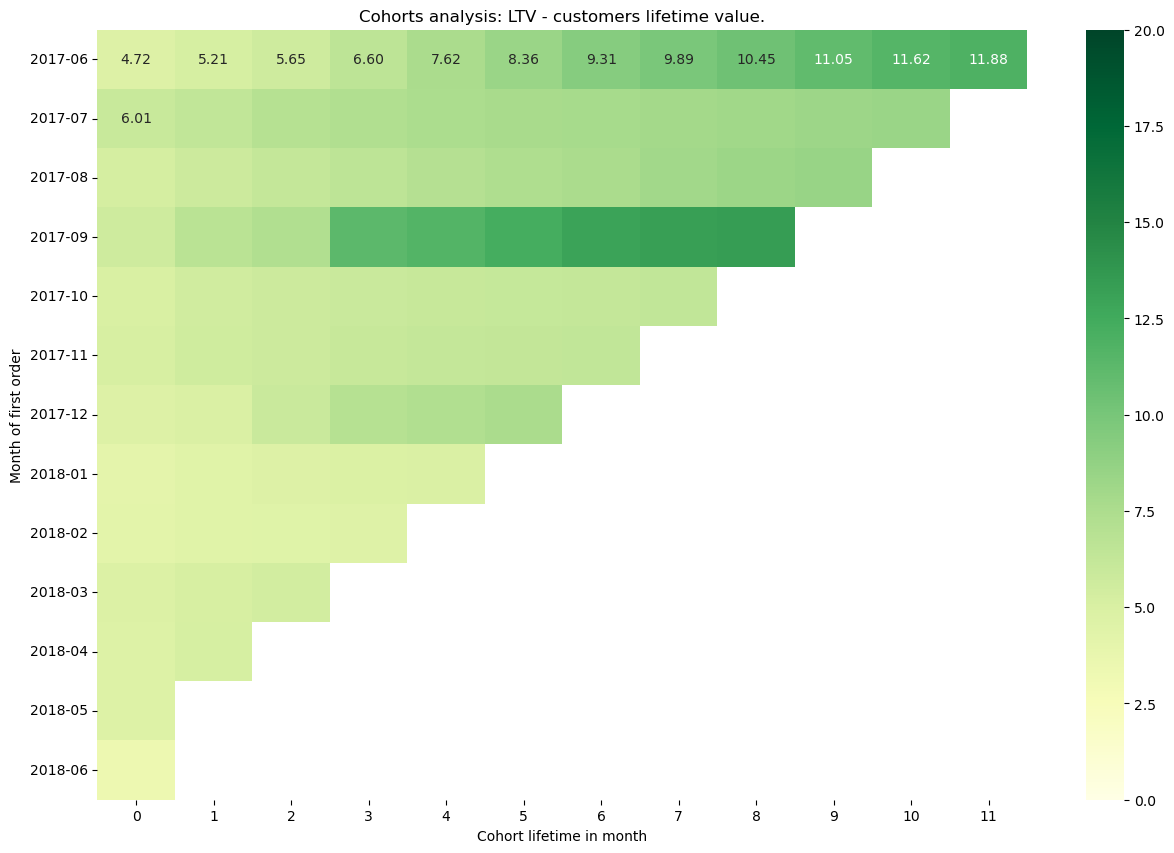

In [142]:
plt.figure(figsize=(15, 10))
plt.title('Cohorts analysis: LTV - customers lifetime value.')

# Create the heatmap with seaborn
ax = sns.heatmap(ltv_cohort_pivot, 
            annot=True, 
            fmt='.2f', 
            vmin = 0,
            vmax = 20,
            cmap = 'YlGn')

# Get the axis objects for further customization
ax = plt.gca()

# Rotate the Y-axis labels by 0 degrees (keeping the text horizontal)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, va='center')

plt.ylabel('Month of first order')
plt.xlabel('Cohort lifetime in month');

- the highest revenues - in zero cohorts lifetime 
- the cohort of September 2017 has highest Total_LTV and also outstanding revenue value '4' in the 3-rd lifetime month
- the cohort of June 2017 has the second best Total_LTV

## Marketing

### How much money was spent? Overall, per source and over time.

In [146]:
# checking original dataframe
costs.head(10)

source_id         dt  costs
0         1 2017-06-01  75.20
1         1 2017-06-02  62.25
2         1 2017-06-03  36.53
3         1 2017-06-04  55.00
4         1 2017-06-05  57.08
5         1 2017-06-06  40.39
6         1 2017-06-07  40.59
7         1 2017-06-08  56.63
8         1 2017-06-09  40.16
9         1 2017-06-10  43.24

In [147]:
# checking wich sources were used more often
costs['source_id'].value_counts()

source_id
5     364
1     363
2     363
3     363
4     363
9     363
10    363
Name: count, dtype: int64

In [148]:
# checking total number of strings in dataframe
costs.shape[0]

2542

In [149]:
# checking total number of days in the dataframe (by 'dt' field)
costs['dt'].nunique()

364

In [150]:
# checking overall costs
costs['costs'].sum()

329131.62

In [151]:
# checking costs per source
costs_sources = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False).reset_index().round()
costs_sources

source_id     costs
0         3  141322.0
1         4   61074.0
2         5   51757.0
3         2   42806.0
4         1   20833.0
5        10    5822.0
6         9    5517.0

In [152]:
# adding % of total costs
costs_sources['%_of_total_costs']= round(costs_sources['costs'] 
                          / costs_sources['costs']
                          .sum()*100, 0)
costs_sources

source_id     costs  %_of_total_costs
0         3  141322.0              43.0
1         4   61074.0              19.0
2         5   51757.0              16.0
3         2   42806.0              13.0
4         1   20833.0               6.0
5        10    5822.0               2.0
6         9    5517.0               2.0

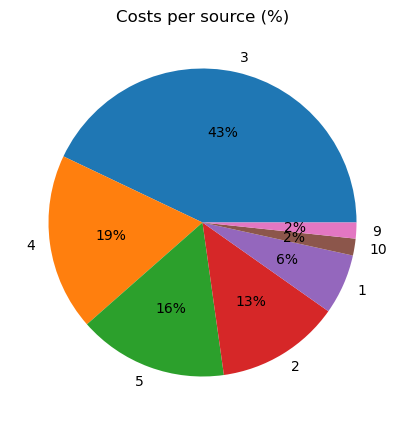

In [153]:
fig, ax = plt.subplots(figsize=(5,5))

ax.pie(costs_sources['costs'], explode=None, labels = costs_sources['source_id'], autopct='%.0f%%')
ax.set_title('Costs per source (%)');


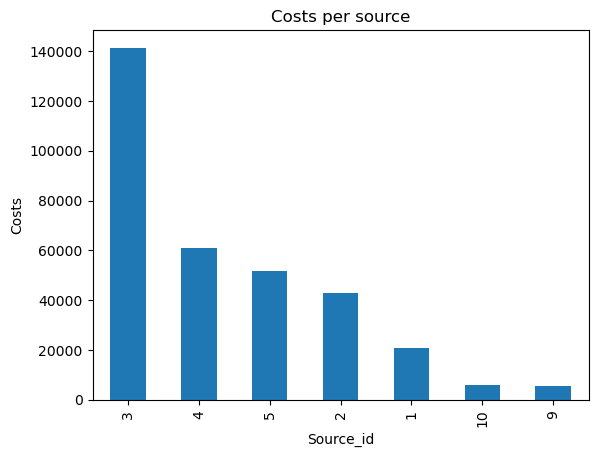

In [154]:
costs.groupby('source_id')['costs'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Source_id')
plt.ylabel('Costs')
plt.title('Costs per source');

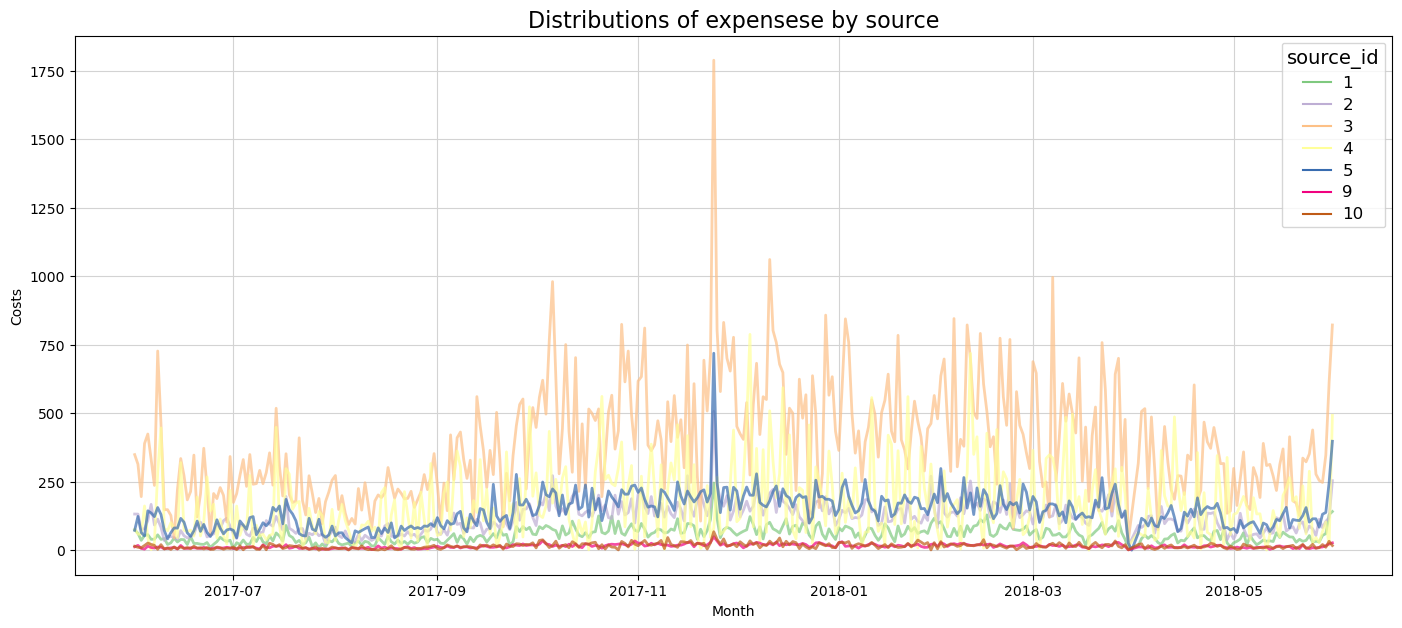

In [155]:
# checking costs over time
# building lineplot gathering all distributions of expenses by sources

plt.figure(figsize=(17,7))
ax = sns.lineplot(data=costs, x='dt', y='costs', hue='source_id', linewidth=2, alpha = 0.7, palette='Accent')
plt.title(f'Distributions of expensese by source', size =16)
plt.grid(True, color='lightgray')
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='14')
plt.xlabel('Month')
plt.ylabel('Costs');

In [156]:
#  Let's leave only the year and month 
costs['cost_month'] = costs['dt'].dt.strftime('%Y-%m')

# calculating the costs per month per each source
costs_by_month_and_source = costs.groupby(['cost_month','source_id'])['costs'].sum().reset_index()
costs_by_month_and_source

cost_month source_id    costs
0     2017-06         1  1125.61
1     2017-06        10   314.22
2     2017-06         2  2427.38
3     2017-06         3  7731.65
4     2017-06         4  3514.80
..        ...       ...      ...
79    2018-05         2  2689.44
80    2018-05         3  9411.42
81    2018-05         4  4214.21
82    2018-05         5  3669.56
83    2018-05         9   362.17

[84 rows x 3 columns]

   cost_month     costs
0     2017-06  18015.00
1     2017-07  18240.59
2     2017-08  14790.54
3     2017-09  24368.91
4     2017-10  36322.88
5     2017-11  37907.88
6     2017-12  38315.35
7     2018-01  33518.52
8     2018-02  32723.03
9     2018-03  30415.27
10    2018-04  22289.38
11    2018-05  22224.27


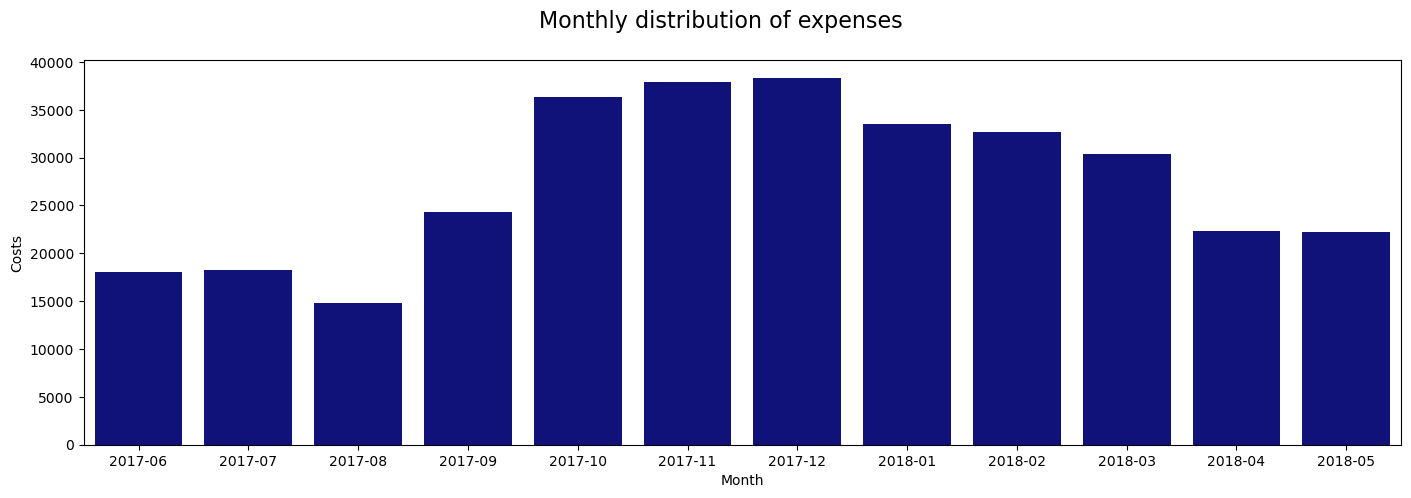

In [157]:
# plotting a barplot describing monthly distribution of all expenseses
costs_by_month = costs.groupby('cost_month')['costs'].sum().reset_index()
print(costs_by_month)

fig, ax = plt.subplots(figsize=(17, 5))
plt.suptitle("Monthly distribution of expenses", fontsize=16)
sns.barplot(x='cost_month', y="costs",  data=costs_by_month, color='darkblue')

plt.ylabel('Costs')
plt.xlabel('Month');

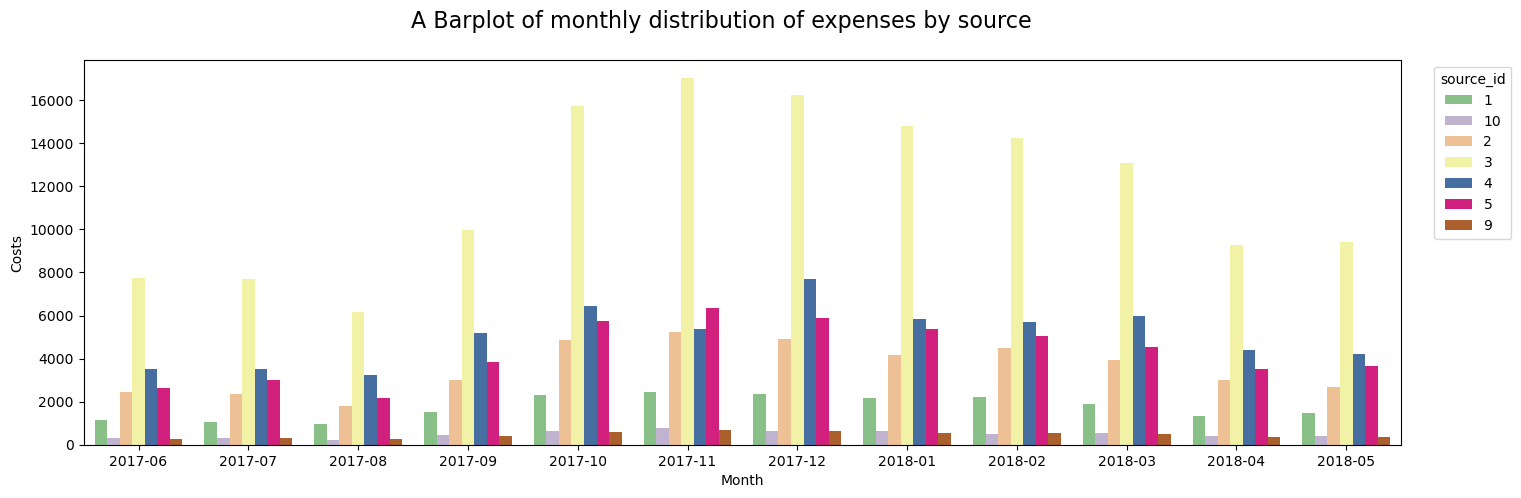

In [158]:
# plotting a barplot describing monthly distribution of all expenseses

# sorting costs to simplify the perception of the graph
# costs_by_month_and_source = costs_by_month_and_source.sort_values(by=['cost_month','costs'], ascending=False)
# barplot_order = costs_by_month_and_source.sort_values(by=['cost_month','costs'], ascending=False).set_index(['cost_month','source_id']).index

fig, ax = plt.subplots(figsize=(17, 5))
plt.suptitle("A Barplot of monthly distribution of expenses by source", fontsize=16)
sns.barplot(x='cost_month', y="costs", hue='source_id', data=costs_by_month_and_source, palette='Accent')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title = 'source_id')

plt.ylabel('Costs')
plt.xlabel('Month');  

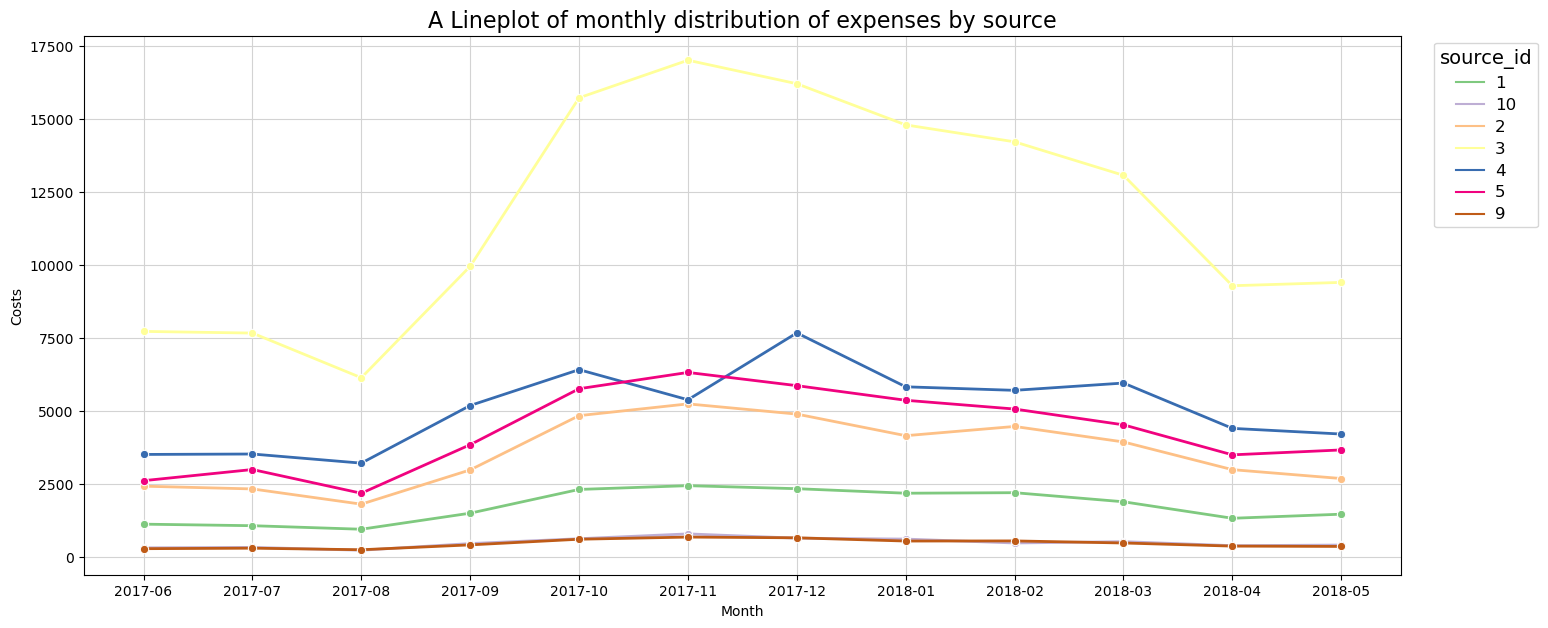

In [159]:
# building monthly lineplot for costs by source

plt.figure(figsize=(17,7))
ax = sns.lineplot(data=costs_by_month_and_source, x='cost_month', y='costs', hue='source_id', marker="o", linewidth=2, palette='Accent')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title = 'source_id')
plt.title('A Lineplot of monthly distribution of expenses by source', size =16)
plt.grid(True, color='lightgray')

plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='14')
plt.xlabel('Month')
plt.ylabel('Costs');

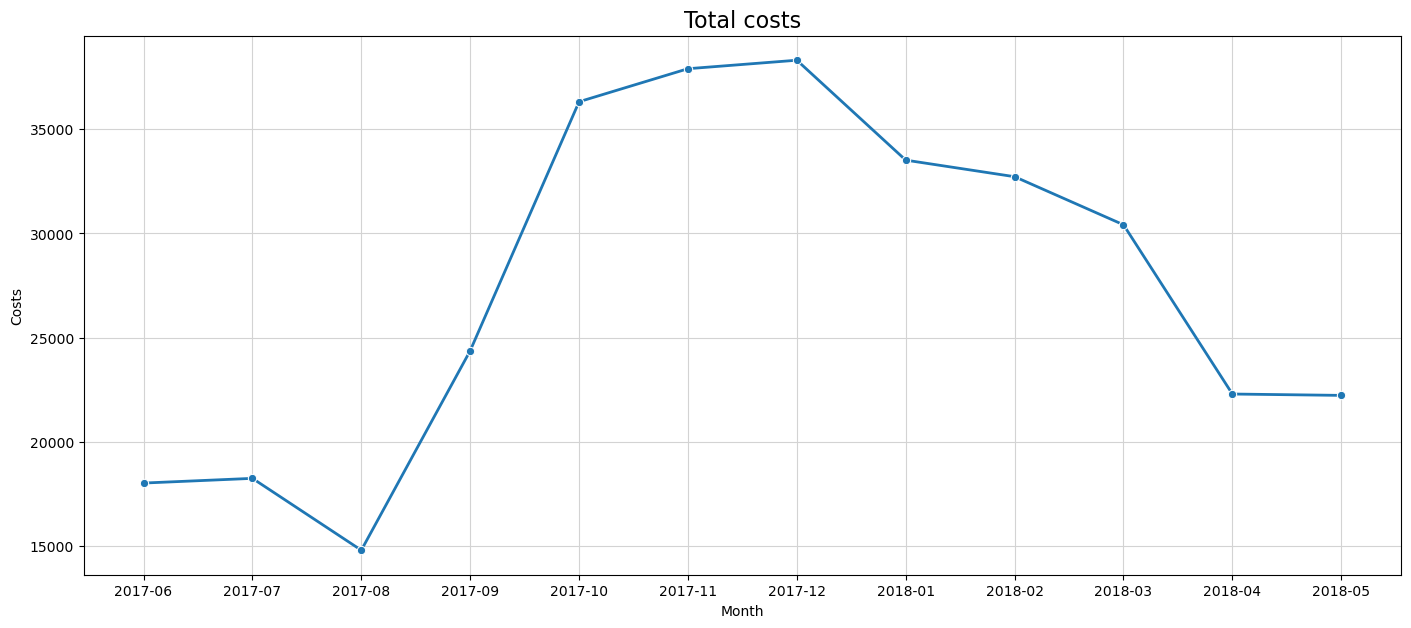

In [160]:
# building monthly lineplot for total costs

plt.figure(figsize=(17,7))
ax = sns.lineplot(data=costs_by_month, x='cost_month', y='costs', marker="o", linewidth=2, )
plt.title('Total costs', size =16)
plt.grid(True, color='lightgray')

plt.xlabel('Month')
plt.ylabel('Costs');

- most marketing expenses are from October 2017 to December 2017 (they must be connected with major sales and new year events) - average total cost for them - 375k
- except one day all resources were used with the same frequency - payments every day

- 3-rd source is absolute leader in expenses - 43% of all costs are more than twice higher than any other

- sources 4, 5, 2 - 141k, 61k, 52k - represent 19%, 16%, 13% of total expenses respectively

### How much did customer acquisition from each of the sources cost?

We are going to calculate **CAC (customer acquisition cost)** - the cost of attracting a customer.

We'll divide the monthly costs for each cohort source by the number of users who were attracted by those sources.

In [164]:
# defining the firsts sources that users came from

first_source = visits.sort_values('start_ts').groupby('uid')['source_id'].first().reset_index()
first_source.columns = ['uid', 'first_source']
first_source.head()

uid first_source
0   11863502262781            3
1   49537067089222            2
2  297729379853735            3
3  313578113262317            2
4  325320750514679            5

In [165]:
# counting number of users attracted by each source 
source_users = first_source['first_source'].value_counts().reset_index()
#source_users=source_users.to_frame()
source_users.columns =['first_source','number_of_users']
source_users['%_of_all_users'] = round(source_users['number_of_users'] 
                                       / source_users['number_of_users'].sum() * 100, 0)
source_users

first_source  number_of_users  %_of_all_users
0            4            72346            32.0
1            3            66116            29.0
2            5            49237            22.0
3            2            17616             8.0
4            1             9469             4.0
5           10             6903             3.0
6            9             6448             3.0
7            7               32             0.0
8            6                2             0.0

In [166]:
# adding to the dataframe above data from 'orders' dataframe
revenue_by_source = orders.merge(first_source, on='uid')
revenue_by_source.head()

buy_ts  revenue                   uid        first_buy_ts  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  order_month first_order_month first_source  
0  2017-06-01        2017-06-01            1  
1  2017-06-01        2017-06-01            2  
2  2017-06-01        2017-06-01            2  
3  2017-06-01        2017-06-01            2  
4  2017-06-01        2017-06-01            3

In [167]:
# creating a table containing buyers by month and source data
buyers_by_month_and_source = revenue_by_source.groupby(['first_order_month', 'first_source'])['uid'].nunique().reset_index()
buyers_by_month_and_source.columns = ['cost_month', 'source_id', 'buyers'] #originaly first_order_month
buyers_by_month_and_source['cost_month'] = buyers_by_month_and_source['cost_month'].dt.strftime('%Y-%m') 
buyers_by_month_and_source

cost_month source_id  buyers
0     2017-06         1     190
1     2017-06        10      95
2     2017-06         2     235
3     2017-06         3     638
4     2017-06         4     413
..        ...       ...     ...
81    2018-05         3     844
82    2018-05         4     804
83    2018-05         5     497
84    2018-05         9      60
85    2018-06         4       1

[86 rows x 3 columns]

In [168]:
costs_by_month_and_source.sample(3)
buyers_by_month_and_source.sample(3)

costs_by_month_and_source.info()
buyers_by_month_and_source.info()

cost_month source_id     costs
24    2017-09         3   9963.55
44    2017-12         2   4897.80
66    2018-03         3  13080.85

cost_month source_id  buyers
32    2017-10         3    1152
73    2018-04         2     210
30    2017-10        10     209

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cost_month  84 non-null     object 
 1   source_id   84 non-null     object 
 2   costs       84 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cost_month  86 non-null     object
 1   source_id   86 non-null     object
 2   buyers      86 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [169]:
# calculating CAC metric by sources and months 
cac_by_month_and_source = costs_by_month_and_source.merge(buyers_by_month_and_source, on=['cost_month', 'source_id'])
cac_by_month_and_source['cac'] = cac_by_month_and_source['costs'] / cac_by_month_and_source['buyers']

cac_grouped_by_source = cac_by_month_and_source.groupby('source_id')['cac'].mean().reset_index()
cac_grouped_by_month = cac_by_month_and_source.groupby('cost_month')['cac'].sum().reset_index()
cac_grouped_by_month_and_source = cac_by_month_and_source.groupby(['cost_month','source_id'])['cac'].mean().reset_index()

cac_grouped_by_source # all months gathered
cac_grouped_by_month # all sources gathered
cac_grouped_by_month_and_source # data by each month

source_id        cac
0         1   7.212107
1        10   4.867125
2         2  12.504068
3         3  13.802743
4         4   6.439374
5         5   7.451938
6         9   5.413892

cost_month        cac
0     2017-06  51.197328
1     2017-07  59.111647
2     2017-08  67.332704
3     2017-09  58.353337
4     2017-10  52.126013
5     2017-11  59.340828
6     2017-12  58.474380
7     2018-01  65.799882
8     2018-02  59.436291
9     2018-03  51.985079
10    2018-04  63.555156
11    2018-05  45.582318

cost_month source_id        cac
0     2017-06         1   5.924263
1     2017-06        10   3.307579
2     2017-06         2  10.329277
3     2017-06         3  12.118574
4     2017-06         4   8.510412
..        ...       ...        ...
79    2018-05         2   6.527767
80    2018-05         3  11.150972
81    2018-05         4   5.241555
82    2018-05         5   7.383421
83    2018-05         9   6.036167

[84 rows x 3 columns]

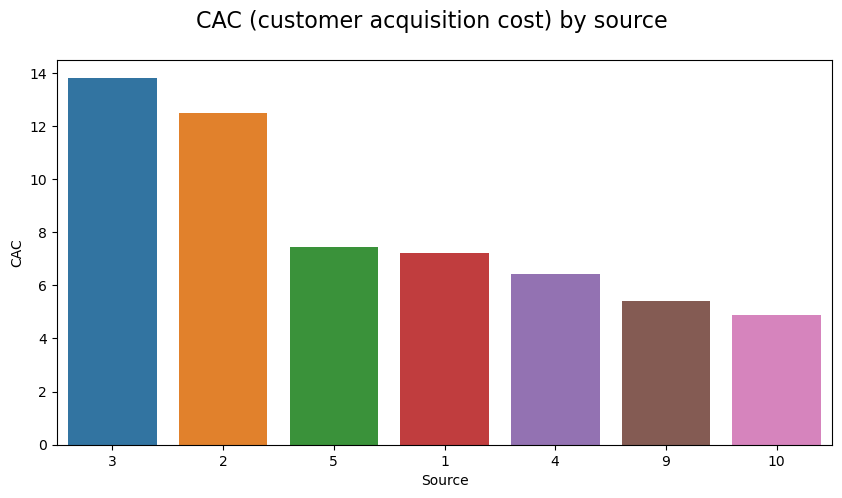

In [170]:
# plotting a barplot on CAC (customer acquisition cost) by source

barplot_order = (cac_grouped_by_source[['source_id','cac']].
                sort_values(by='cac', ascending=False).
                set_index('source_id').index) # defining order of bars

fig, ax = plt.subplots(figsize=(10, 5))
plt.suptitle("CAC (customer acquisition cost) by source", fontsize=16)
sns.barplot(x='source_id', y="cac", 
            data=cac_grouped_by_source,
            order=barplot_order)
plt.ylabel('CAC')
plt.xlabel('Source');

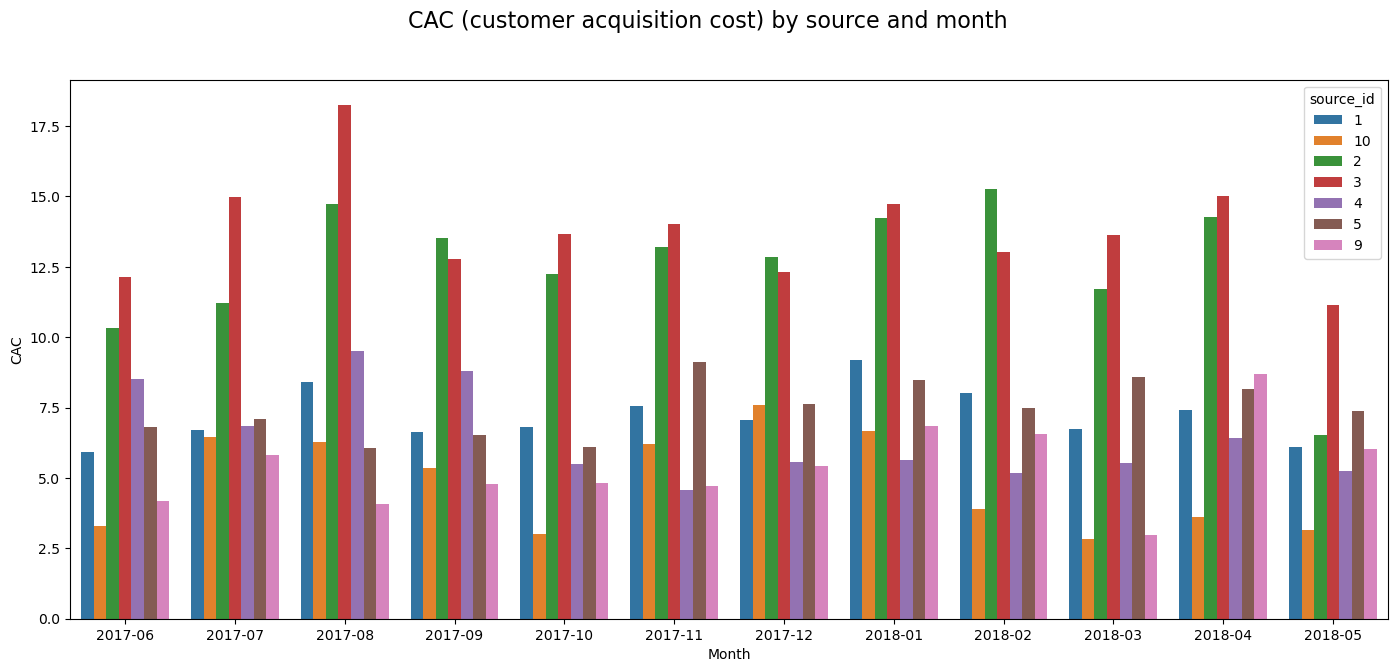

In [171]:
# plotting a barplot on CAC (customer acquisition cost) by source and month
fig, ax = plt.subplots(figsize=(17, 7))
plt.suptitle("CAC (customer acquisition cost) by source and month", fontsize=16)
sns.barplot(x='cost_month', y="cac", hue='source_id', data=cac_grouped_by_month_and_source)

plt.ylabel('CAC')
plt.xlabel('Month');

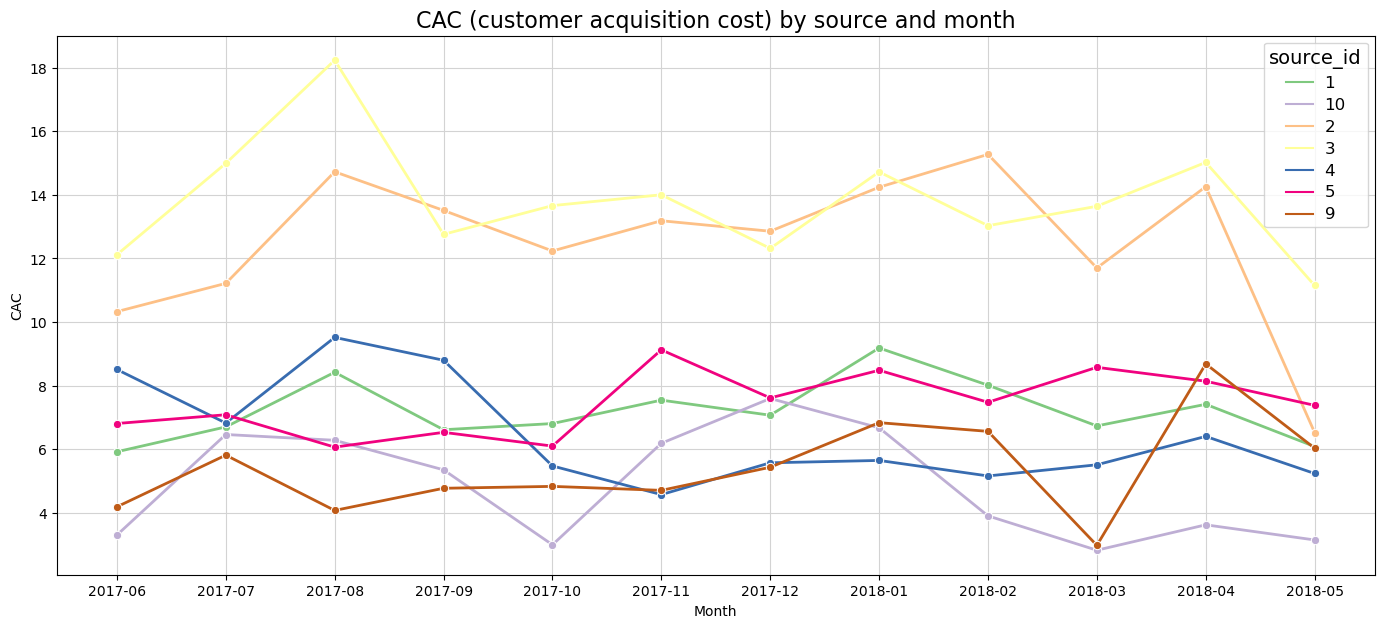

In [172]:
# building monthly lineplot on CAC (customer acquisition cost) by source and month
plt.figure(figsize=(17,7))
ax = sns.lineplot(data=cac_grouped_by_month_and_source, x='cost_month', y='cac', hue='source_id', marker="o", linewidth=2, palette='Accent')
plt.title('CAC (customer acquisition cost) by source and month', size =16)
plt.grid(True, color='lightgray')

plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='14')
plt.xlabel('Month')
plt.ylabel('CAC');

In [173]:
revenue_per_month=orders.groupby('order_month')['revenue'].sum().reset_index()

In [174]:
revenue_per_month['order_month'] = revenue_per_month['order_month'].dt.strftime('%Y-%m') 

In [175]:
revenue_per_month.head()

order_month   revenue
0     2017-06   9557.49
1     2017-07  12539.47
2     2017-08   8758.78
3     2017-09  18345.51
4     2017-10  27987.70

In [176]:
economics = pd.merge(revenue_per_month, costs_by_month, left_on='order_month', right_on='cost_month')

In [177]:
economics.head()

order_month   revenue cost_month     costs
0     2017-06   9557.49    2017-06  18015.00
1     2017-07  12539.47    2017-07  18240.59
2     2017-08   8758.78    2017-08  14790.54
3     2017-09  18345.51    2017-09  24368.91
4     2017-10  27987.70    2017-10  36322.88

In [178]:
economics = economics[['order_month','revenue','costs']]

In [179]:
economics.head()

order_month   revenue     costs
0     2017-06   9557.49  18015.00
1     2017-07  12539.47  18240.59
2     2017-08   8758.78  14790.54
3     2017-09  18345.51  24368.91
4     2017-10  27987.70  36322.88

In [180]:
economics = economics.rename(columns={'order_month':'month'})

In [181]:
economics

month   revenue     costs
0   2017-06   9557.49  18015.00
1   2017-07  12539.47  18240.59
2   2017-08   8758.78  14790.54
3   2017-09  18345.51  24368.91
4   2017-10  27987.70  36322.88
5   2017-11  27069.93  37907.88
6   2017-12  36388.60  38315.35
7   2018-01  19417.13  33518.52
8   2018-02  25560.54  32723.03
9   2018-03  28834.59  30415.27
10  2018-04  16858.06  22289.38
11  2018-05  20735.98  22224.27

In [182]:
cohorts_by_first_orders

first_order_month  cohort_size
0         2017-06-01         2023
1         2017-07-01         1923
2         2017-08-01         1370
3         2017-09-01         2581
4         2017-10-01         4340
5         2017-11-01         4081
6         2017-12-01         4383
7         2018-01-01         3373
8         2018-02-01         3651
9         2018-03-01         3533
10        2018-04-01         2276
11        2018-05-01         2988
12        2018-06-01            1

In [183]:
cohorts_by_first_orders['first_order_month'] = cohorts_by_first_orders['first_order_month'].dt.strftime('%Y-%m') 

In [184]:
cohorts_by_first_orders.columns=['month', 'buyers']
economics = economics.merge(cohorts_by_first_orders, on='month')
economics['cac'] = economics['costs']/economics['buyers']

In [185]:
economics.head()

month   revenue     costs  buyers        cac
0  2017-06   9557.49  18015.00    2023   8.905091
1  2017-07  12539.47  18240.59    1923   9.485486
2  2017-08   8758.78  14790.54    1370  10.796015
3  2017-09  18345.51  24368.91    2581   9.441654
4  2017-10  27987.70  36322.88    4340   8.369327

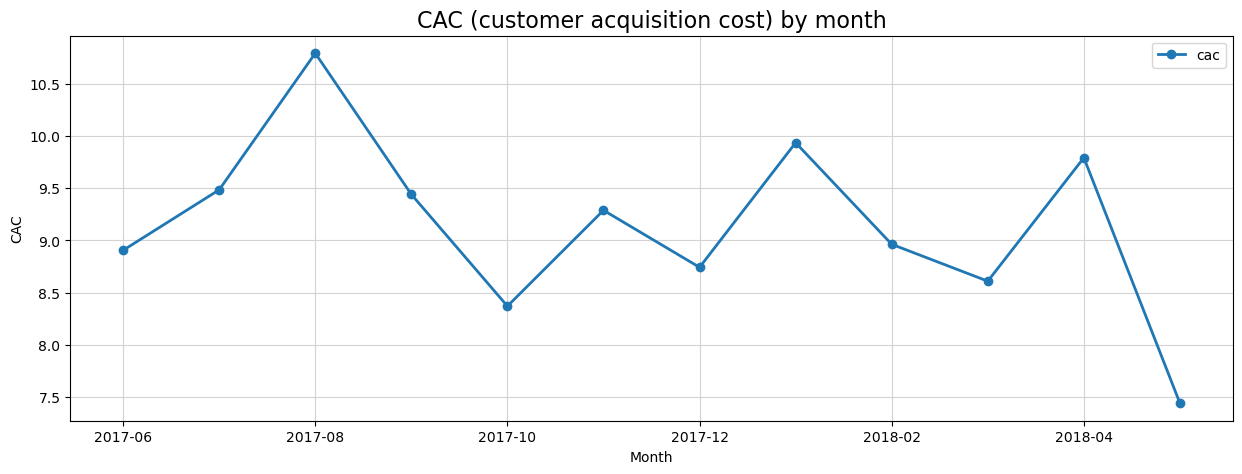

In [186]:
economics[['cac', 'month']].plot(x='month', kind='line', figsize=(15, 5), marker='o', linewidth=2)
plt.title('CAC (customer acquisition cost) by month', size =16)
plt.grid(True, color='lightgray')
plt.xlabel('Month')
plt.ylabel('CAC');

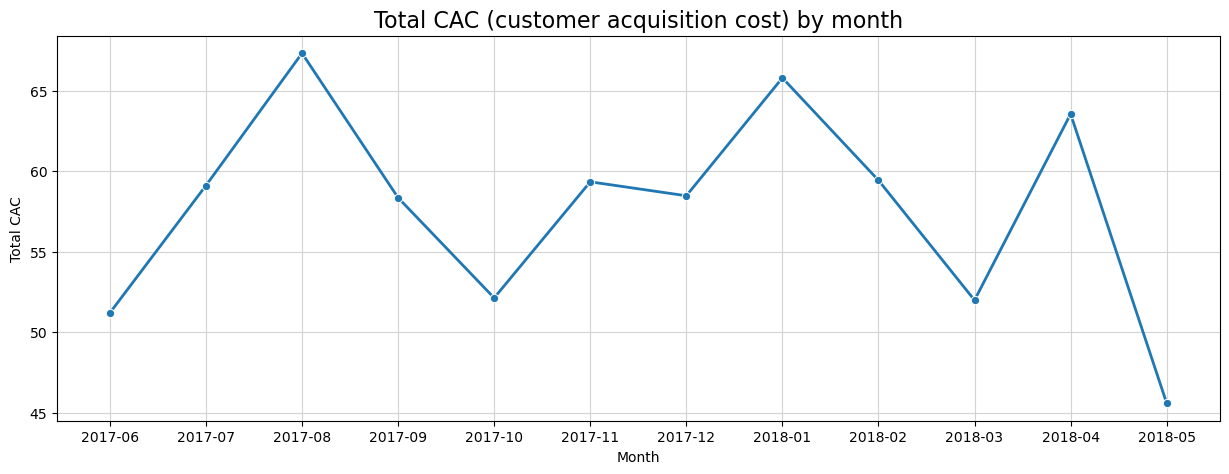

In [187]:
# building monthly lineplot on CAC (customer acquisition cost) by month
plt.figure(figsize=(15, 5))
ax = sns.lineplot(data=cac_grouped_by_month, x='cost_month', y='cac', marker='o', linewidth=2)
plt.grid(True, color='lightgray')

plt.title('Total CAC (customer acquisition cost) by month', size =16)
plt.xlabel('Month')
plt.ylabel('Total CAC');

- in general customer acquisition costs are most expensive through sources 3 and 2 - with 12.5 and 13.8 respectively
- CAC through sources 10 and 9 are the cheapest - with 4.9 and 5.4 respectively

### How worthwhile where the investments? (ROI)

In [190]:
# checking original dataframe
revenue_by_source

buy_ts  revenue                   uid        first_buy_ts  \
0     2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   
...                   ...      ...                   ...                 ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31 23:50:00   
50411 2018-05-31 23:50:00     5.80  11369640365507475976 2018-05-31 23:50:00   
50412 2018-05-31 23:54:00     0.30   1786462140797698849 2018-05-31 23:54:00   
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 23:56:00   
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01 00:02:00   

      order_month first_order_month first_source  
0      2017-06-01        2017-06-01            1  
1      2017-06-01        2017-06-01            2  
2      2017-06-01        2017-06-01            2  
3      2017-06-01        2017-06-01            2  
4      2017-06-01        2017-06-01            3  
...           ...               ...          ...  
50410  2018-05-01        2018-05-01            4  
50411  2018-05-01        2018-05-01           10  
50412  2018-05-01        2018-05-01            3  
50413  2018-05-01        2018-05-01            3  
50414  2018-06-01        2018-06-01            4  

[50415 rows x 7 columns]

In [191]:
# let's calculate revenues by each source and LTV (by user) for each source
ltv_by_source = (revenue_by_source.groupby(['order_month', 'first_source'])[['uid', 'revenue']].
                 agg({'uid':'nunique', 'revenue':'sum'}).reset_index())
ltv_by_source.columns = ['order_month','source_id', 'buyers', 'revenue']
ltv_by_source['ltv'] = ltv_by_source['revenue'] / ltv_by_source['buyers'] 
ltv_by_source


order_month source_id  buyers  revenue       ltv
0   2017-06-01         1     190  1378.70  7.256316
1   2017-06-01        10      95   229.35  2.414211
2   2017-06-01         2     235  1043.68  4.441191
3   2017-06-01         3     638  2804.34  4.395517
4   2017-06-01         4     413  1959.84  4.745375
..         ...       ...     ...      ...       ...
81  2018-05-01         3     992  4953.62  4.993569
82  2018-05-01         4     947  4656.30  4.916895
83  2018-05-01         5     571  2550.39  4.466532
84  2018-05-01         9      82   376.66  4.593415
85  2018-06-01         4       1     3.42  3.420000

[86 rows x 5 columns]

In [192]:
# now let's find ROI by dividing LTV by CAC
roi_grouped_by_source = ltv_by_source.merge(cac_grouped_by_source, on='source_id')
roi_grouped_by_source['roi'] = roi_grouped_by_source['ltv'] / roi_grouped_by_source['cac']
roi_grouped_by_source['order_month'] = roi_grouped_by_source['order_month'].dt.strftime('%Y-%m') 
roi_grouped_by_source

order_month source_id  buyers  revenue       ltv        cac       roi
0      2017-06         1     190  1378.70  7.256316   7.212107  1.006130
1      2017-06        10      95   229.35  2.414211   4.867125  0.496024
2      2017-06         2     235  1043.68  4.441191  12.504068  0.355180
3      2017-06         3     638  2804.34  4.395517  13.802743  0.318452
4      2017-06         4     413  1959.84  4.745375   6.439374  0.736931
..         ...       ...     ...      ...       ...        ...       ...
80     2018-05         3     992  4953.62  4.993569  13.802743  0.361781
81     2018-05         4     947  4656.30  4.916895   6.439374  0.763567
82     2018-05         5     571  2550.39  4.466532   7.451938  0.599379
83     2018-05         9      82   376.66  4.593415   5.413892  0.848450
84     2018-06         4       1     3.42  3.420000   6.439374  0.531108

[85 rows x 7 columns]

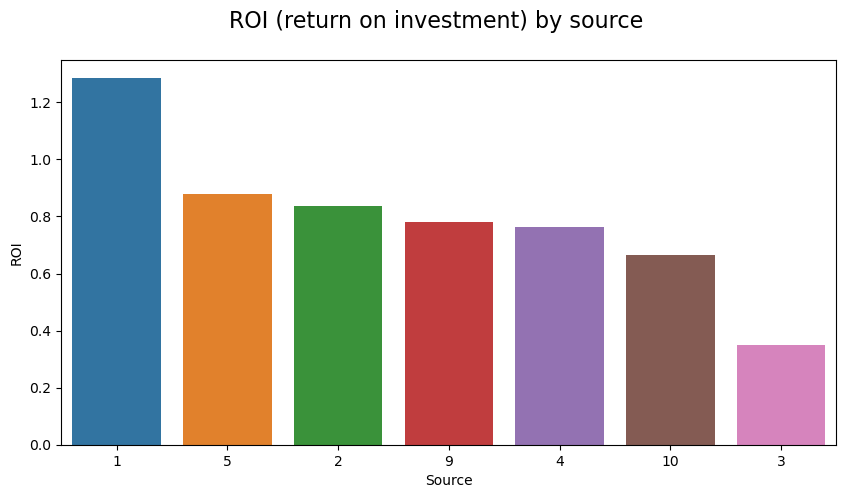

In [193]:
# plotting a barplot on ROI (return on investment) by source 

barplot_order = (roi_grouped_by_source.groupby('source_id')['roi'].
                 mean().sort_values(ascending=False).index) # defining order of bars

fig, ax = plt.subplots(figsize=(10, 5))
plt.suptitle("ROI (return on investment) by source", fontsize=16)
sns.barplot(x='source_id', y="roi", 
            data=roi_grouped_by_source, 
            order=barplot_order,
            ci = None)
plt.ylabel('ROI')
plt.xlabel('Source');

In [194]:
roi_medians = roi_grouped_by_source.groupby('source_id')['roi'].median().round(1)
roi_medians.reset_index().sort_values(by='roi', ascending=False).set_index('source_id')

roi
source_id     
1          1.3
2          0.8
4          0.8
5          0.8
9          0.8
10         0.7
3          0.3

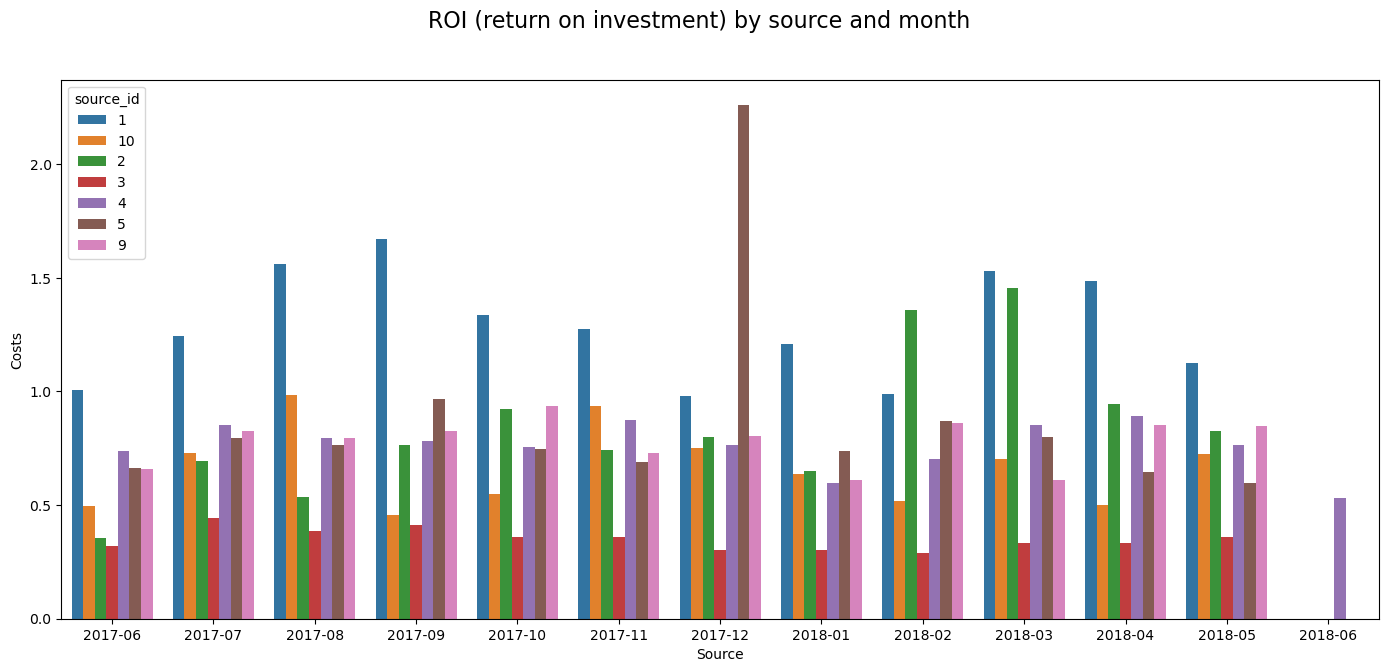

In [195]:
# plotting a barplot on ROI (return on investment) by source and month
fig, ax = plt.subplots(figsize=(17, 7))
plt.suptitle("ROI (return on investment) by source and month", fontsize=16)
sns.barplot(x='order_month', y="roi", hue='source_id', data=roi_grouped_by_source, ci = None)
plt.ylabel('Costs')
plt.xlabel('Source');

In [196]:
economics

month   revenue     costs  buyers        cac
0   2017-06   9557.49  18015.00    2023   8.905091
1   2017-07  12539.47  18240.59    1923   9.485486
2   2017-08   8758.78  14790.54    1370  10.796015
3   2017-09  18345.51  24368.91    2581   9.441654
4   2017-10  27987.70  36322.88    4340   8.369327
5   2017-11  27069.93  37907.88    4081   9.288870
6   2017-12  36388.60  38315.35    4383   8.741809
7   2018-01  19417.13  33518.52    3373   9.937302
8   2018-02  25560.54  32723.03    3651   8.962758
9   2018-03  28834.59  30415.27    3533   8.608907
10  2018-04  16858.06  22289.38    2276   9.793225
11  2018-05  20735.98  22224.27    2988   7.437841

In [197]:
ltv_cohort

first_order_month order_month  total_revenue  cohort_lifetime_days  \
0            2017-06  2017-06-01        9557.49                     0   
1            2017-06  2017-07-01         981.82                    30   
2            2017-06  2017-08-01         885.34                    61   
3            2017-06  2017-09-01        1931.30                    92   
4            2017-06  2017-10-01        2068.58                   122   
..               ...         ...            ...                   ...   
74           2018-03  2018-05-01        1114.87                    61   
75           2018-04  2018-04-01       10600.69                     0   
76           2018-04  2018-05-01        1209.92                    30   
77           2018-05  2018-05-01       13925.76                     0   
78           2018-06  2018-06-01           3.42                     0   

    cohort_lifetime_month  cohort_size       ltv  
0                       0         2023  4.724414  
1                       1         2023  0.485329  
2                       2         2023  0.437637  
3                       3         2023  0.954671  
4                       4         2023  1.022531  
..                    ...          ...       ...  
74                      2         3533  0.315559  
75                      0         2276  4.657597  
76                      1         2276  0.531599  
77                      0         2988  4.660562  
78                      0            1  3.420000  

[79 rows x 7 columns]

In [198]:
cac_roi=economics[['month','cac']]
cac_roi.columns=['first_order_month','cac']

In [199]:
cac_roi

first_order_month        cac
0            2017-06   8.905091
1            2017-07   9.485486
2            2017-08  10.796015
3            2017-09   9.441654
4            2017-10   8.369327
5            2017-11   9.288870
6            2017-12   8.741809
7            2018-01   9.937302
8            2018-02   8.962758
9            2018-03   8.608907
10           2018-04   9.793225
11           2018-05   7.437841

In [200]:
ltv_cohort

first_order_month order_month  total_revenue  cohort_lifetime_days  \
0            2017-06  2017-06-01        9557.49                     0   
1            2017-06  2017-07-01         981.82                    30   
2            2017-06  2017-08-01         885.34                    61   
3            2017-06  2017-09-01        1931.30                    92   
4            2017-06  2017-10-01        2068.58                   122   
..               ...         ...            ...                   ...   
74           2018-03  2018-05-01        1114.87                    61   
75           2018-04  2018-04-01       10600.69                     0   
76           2018-04  2018-05-01        1209.92                    30   
77           2018-05  2018-05-01       13925.76                     0   
78           2018-06  2018-06-01           3.42                     0   

    cohort_lifetime_month  cohort_size       ltv  
0                       0         2023  4.724414  
1                       1         2023  0.485329  
2                       2         2023  0.437637  
3                       3         2023  0.954671  
4                       4         2023  1.022531  
..                    ...          ...       ...  
74                      2         3533  0.315559  
75                      0         2276  4.657597  
76                      1         2276  0.531599  
77                      0         2988  4.660562  
78                      0            1  3.420000  

[79 rows x 7 columns]

In [201]:
roi=ltv_cohort.merge(cac_roi, on=['first_order_month'],how='left')

In [202]:
roi.head()

first_order_month order_month  total_revenue  cohort_lifetime_days  \
0           2017-06  2017-06-01        9557.49                     0   
1           2017-06  2017-07-01         981.82                    30   
2           2017-06  2017-08-01         885.34                    61   
3           2017-06  2017-09-01        1931.30                    92   
4           2017-06  2017-10-01        2068.58                   122   

   cohort_lifetime_month  cohort_size       ltv       cac  
0                      0         2023  4.724414  8.905091  
1                      1         2023  0.485329  8.905091  
2                      2         2023  0.437637  8.905091  
3                      3         2023  0.954671  8.905091  
4                      4         2023  1.022531  8.905091

In [203]:
roi['roi']=roi['ltv']/roi['cac']
roi_pivot = roi.pivot_table(
    index='first_order_month', columns='cohort_lifetime_month', values='roi', aggfunc='mean'
).cumsum(axis=1).round(2) 

In [204]:
roi_pivot 

cohort_lifetime_month    0     1     2     3     4     5     6     7     8   \
first_order_month                                                             
2017-06                0.53  0.59  0.63  0.74  0.86  0.94  1.05  1.11  1.17   
2017-07                0.63  0.67  0.73  0.77  0.79  0.81  0.82  0.84  0.85   
2017-08                0.49  0.53  0.57  0.61  0.66  0.68  0.70  0.74  0.77   
2017-09                0.60  0.72  0.77  1.19  1.23  1.30  1.38  1.40  1.42   
2017-10                0.60  0.66  0.68  0.70  0.72  0.74  0.75  0.76   NaN   
2017-11                0.55  0.60  0.62  0.65  0.67  0.68  0.69   NaN   NaN   
2017-12                0.54  0.57  0.68  0.80  0.84  0.87   NaN   NaN   NaN   
2018-01                0.42  0.45  0.48  0.49  0.50   NaN   NaN   NaN   NaN   
2018-02                0.46  0.49  0.50  0.51   NaN   NaN   NaN   NaN   NaN   
2018-03                0.56  0.60  0.63   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04                0.48  0.53   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-05                0.63   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

cohort_lifetime_month    9     10    11  
first_order_month                        
2017-06                1.24  1.31  1.33  
2017-07                0.87  0.88   NaN  
2017-08                0.78   NaN   NaN  
2017-09                 NaN   NaN   NaN  
2017-10                 NaN   NaN   NaN  
2017-11                 NaN   NaN   NaN  
2017-12                 NaN   NaN   NaN  
2018-01                 NaN   NaN   NaN  
2018-02                 NaN   NaN   NaN  
2018-03                 NaN   NaN   NaN  
2018-04                 NaN   NaN   NaN  
2018-05                 NaN   NaN   NaN

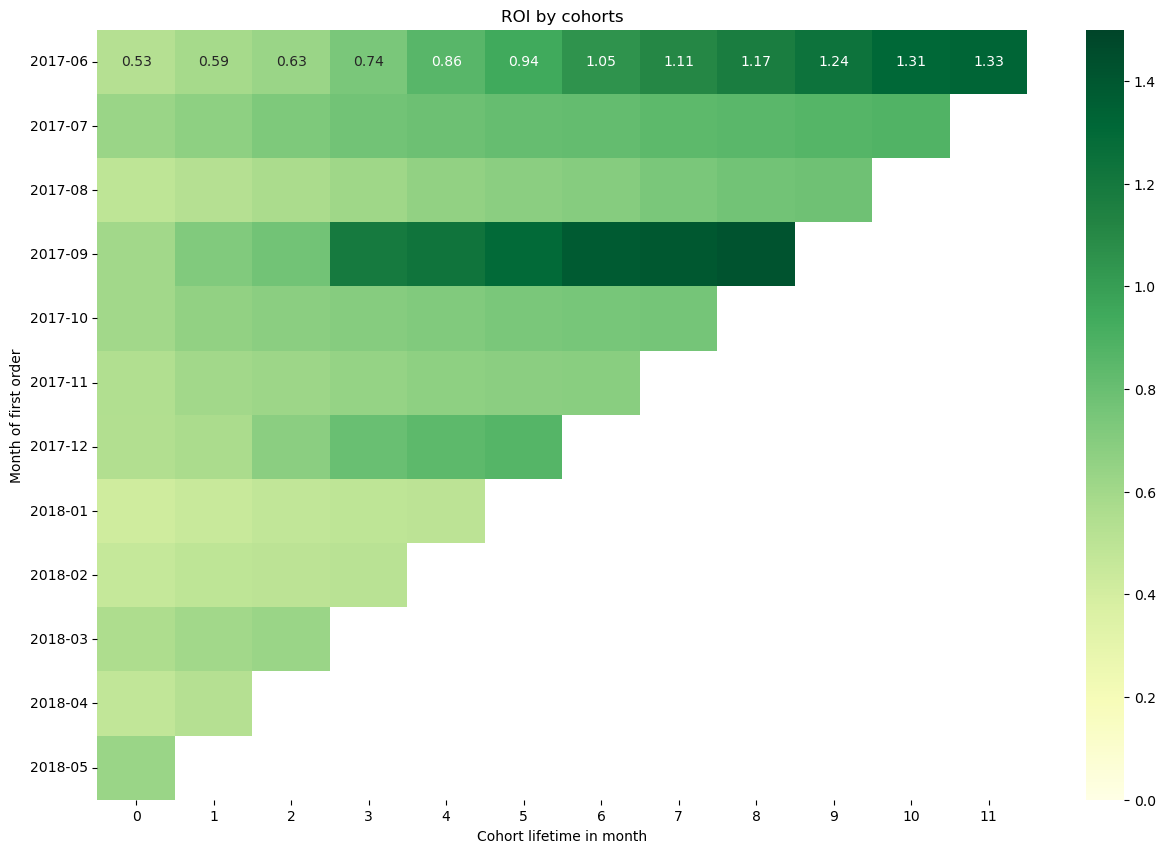

In [205]:
plt.figure(figsize=(15, 10))
plt.title('ROI by cohorts')

# Create the heatmap with seaborn
ax = sns.heatmap(roi_pivot, 
            annot=True, 
            fmt='.2f', 
            vmin = 0,
            vmax = 1.5,
            cmap = 'YlGn')

# Get the axis objects for further customization
ax = plt.gca()

# Rotate the Y-axis labels by 0 degrees (keeping the text horizontal)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, va='center')

plt.ylabel('Month of first order')
plt.xlabel('Cohort lifetime in month');

- 1st source has the highest ROI - 1.3
- 3rd source has the worst ROI - 0.3
- marketing expences paid off only for cohorts of June 2017 by the 6th month, and of September 2017 by 3d month.
- we found an interesting inside through monthly analysis - 5th source ROI is extremely good in December ~2.3; 2nd source showed very good ROI in February and March ~1.5

# Step 3. Write a conclusion: advise marketing experts how much money to invest and where.


## Findings


### Product
#### How many people use it every day, week, and month?

There are three major periods: from June to October 2017, when daily users were below average; from October 2017 to March 2018 activity was above average; and from mid-March to end-May 2018, there was a decrease. A major promotion/discount event may have caused the peak in November 2017.

- DAU (daily active users)* - 921
- WAU (weekly active users) - 5894
- MAU (monthly active users) - 24240

*here and throughout, we rely on median figures when dealing with non-normal, skewed, or outlier-heavy distributions.

#### How many sessions are there per day?

- Typically users make: 1003 sessions per day (median value)
- On average a user make: 1.08 sessions a day

#### What is the length of each session?

- For all the devices the mode time of session is 60 seconds (the most common number in the data set).
- While median values are different: 180 seconds for touch, 360 seconds for desktop and 300 for both desktop and touch devices.
- Thus people use to have twice longer sessions on desktops.

#### What's the user retention rate?
- Retention median -  4,8% (for all months/cohorts)
- September's 2017 cohorts have the highest retention rate for the 1-st and 2-nd months' lifetime.
- June's 2017 retention rate keeps the highest positions in the long run.


### Sales

#### When do people start buying?
- Median time to first order: 2 days.
- 12% of orders within 0 seconds from first session, likely from ads or direct links.
- Overall conversion rate: 16% (percentage of users who placed orders).

#### How many orders do they make during a given period of time?
- In the zero cohort lifetime (session_month = first_session_month), the average number of orders per user is more than ten times higher than in other periods.
- Apart from the first cohort, later cohorts show a declining trend in the number of orders made.
- The median number of orders per user is 1.43, while excluding the 0 cohort lifetime, it is 0.04.

#### What is the average purchase size?

- The typical purchase is 2.82 (median value)
- Highest typical purchase in the 1st, 3rd, and 5th cohort's lifetime: September 2017 - 4.9, 5.5, 4.9.
- The cohort of August and September 2017 in general have the highest average revenues per order value: 3.7, 3.8
- A trend observed: longer cohort lifetime correlates with higher revenue per order.

#### How much money do they bring? (LTV)
- Highest revenues in zero cohorts lifetime.
- September 2017 cohort has highest LTV and outstanding revenue value '4' in the 3rd lifetime month.
- June 2017 cohort has the second-best LTV.

### Marketing
#### How much money was spent? Overall, per source and over time.
- High marketing expenses from October 2017 to December 2017, averaging 375k, likely related to major sales and New Year events.
- 3rd source leads in expenses, accounting for 43% of all costs, more than twice higher than any other; Sources 4, 5, and 2 represent 19%, 16%, and 13% of total expenses respectively, amounting to 141k, 61k, and 52k.

#### How much did customer acquisition from each of the sources cost?
- Highest customer acquisition costs: sources 3 (12.5) and 2 (13.8).
- Lowest customer acquisition costs: sources 10 (4.9) and 9 (5.4).

#### How worthwhile where the investments? (ROI)
- 1st source: highest ROI - 1.3.
- 3rd source: worst ROI - 0.3.
- Interesting insight from monthly analysis: 5th source's ROI extremely good in December (~ 2.3); 2nd source showed very good ROI in February and March (~ 1.5).



### Recommendations

- The cohorts that made their first orders in September 2017 and June 2017 stand out as the most profitable for the company, with LTVs of 13.5 and 12, respectively. Investigating the success factors behind these cohorts could offer valuable insights for scaling and sharing this experience.
- Source 1 demonstrates the highest ROI, making it a promising investment despite its current 4% share in attracting new users.
- Exploring the success of Source 1 may provide valuable insights applicable to other sources, given its outstanding ROI.
- On the other hand, Source 3 has the worst ROI, more than four times lower than Source 1, but it contributes to almost one-third of all users. If broad audience reach is not a priority, it's advisable to consider reducing its budget or phasing it out.
- Additionally, our monthly analysis reveals intriguing findings: the 5th source shows extremely good ROI in December (~ 2.3), and the 2nd source demonstrates excellent ROI in February and March (~ 1.5). Exploring the factors behind these results could offer opportunities for scaling and improvement.


### Extra findings

Sessions lengths of zero seconds represent almost 10% of all the dataset! That's something we shouldn't ignore.

Lot's of zero time visits could be a sign of poor data logging. From the samples above it's not clear what causes zero-time sessions, but we can guess what they could be. Probably when a visitor exits the site after viewing only one page without interacting and then leaving - this could be treated as zero-time sessions (there are no second timestamps needed for configuring session time). Seems like such events could be difficult to log and further analyze the engagement of users.

If such kind of analysis must be regular, than it's worth somehow improve logging and/or enhance engaging of users (thus if our theory is correct - make them visit more than one page, create more than one timestamp) 

Some basic ideas to keep people engaging with more content could be: 
- Suggest relevant articles/events at the end of each page.
- Connect related posts/events for easy navigation.
- Keep popular categories accessible at all times.
- Add/keep visible "Contact Us" or "Explore More" prompts.

These improvements can enhance user engagement, site interaction and lead to better logging, produce better data for further analysis.